## Decide lag number

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import (
    month_plot,
    quarter_plot,
    plot_acf,
    plot_pacf
)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error)
from sklearn.model_selection import ParameterGrid
import numpy as np

In [58]:
import pandas as pd
df  = pd.read_csv("../data/3_df_merged_cleaned.csv")
df.head(10)

,City,Cases,Pressure,Tmean,Tmin,Tmax,Humidity,Windspeed,Precip,BI,HI,CI,PI,AI,AIAeg,AIAlb
0,Pingtung County,1,1015.17,23.57,21.9,26.2,72.39,3.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pingtung County,1,1015.63,23.62,20.8,27.2,74.91,1.12,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yilan County,1,1013.73,19.81,15.6,24.8,77.98,1.95,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kaohsiung City,1,1008.14,19.63,17.3,24.6,79.57,4.00,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yilan County,1,1021.38,14.42,11.3,16.9,89.24,1.87,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Taoyuan City,1,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,New Taipei City,1,1018.29,11.05,9.9,15.0,94.60,1.97,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Taipei City,1,969.09,9.23,4.6,14.5,93.19,3.54,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tainan City,1,1016.82,19.28,15.5,24.3,79.61,2.52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kaohsiung City,1,1013.81,24.27,19.6,29.1,78.87,2.30,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10713 entries, 0 to 10712
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       10713 non-null  object 
 1   Cases      10713 non-null  int64  
 2   Pressure   9085 non-null   float64
 3   Tmean      9675 non-null   float64
 4   Tmin       9674 non-null   float64
 5   Tmax       9636 non-null   float64
 6   Humidity   9472 non-null   float64
 7   Windspeed  9725 non-null   float64
 8   Precip     9706 non-null   float64
 9   BI         6101 non-null   float64
 10  HI         6101 non-null   float64
 11  CI         6087 non-null   float64
 12  PI         4466 non-null   float64
 13  AI         6101 non-null   float64
 14  AIAeg      6101 non-null   float64
 15  AIAlb      6101 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.3+ MB


In [60]:
df.head(10)

,City,Cases,Pressure,Tmean,Tmin,Tmax,Humidity,Windspeed,Precip,BI,HI,CI,PI,AI,AIAeg,AIAlb
0,Pingtung County,1,1015.17,23.57,21.9,26.2,72.39,3.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pingtung County,1,1015.63,23.62,20.8,27.2,74.91,1.12,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yilan County,1,1013.73,19.81,15.6,24.8,77.98,1.95,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kaohsiung City,1,1008.14,19.63,17.3,24.6,79.57,4.00,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yilan County,1,1021.38,14.42,11.3,16.9,89.24,1.87,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Taoyuan City,1,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,New Taipei City,1,1018.29,11.05,9.9,15.0,94.60,1.97,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Taipei City,1,969.09,9.23,4.6,14.5,93.19,3.54,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tainan City,1,1016.82,19.28,15.5,24.3,79.61,2.52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kaohsiung City,1,1013.81,24.27,19.6,29.1,78.87,2.30,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare the data

## Check Autocorrelation of Dengue Cases

In [61]:
# Select Kaohsiung City
kaohsiung = df[df["City"] == "Kaohsiung City"].copy()

# Ensure Date column is datetime
kaohsiung["Date"] = pd.to_datetime(kaohsiung["Date"], errors='coerce')

# Set Date as index and sort
kaohsiung = kaohsiung.set_index("Date").sort_index()


KeyError: 'Date'

<Figure size 1000x400 with 0 Axes>

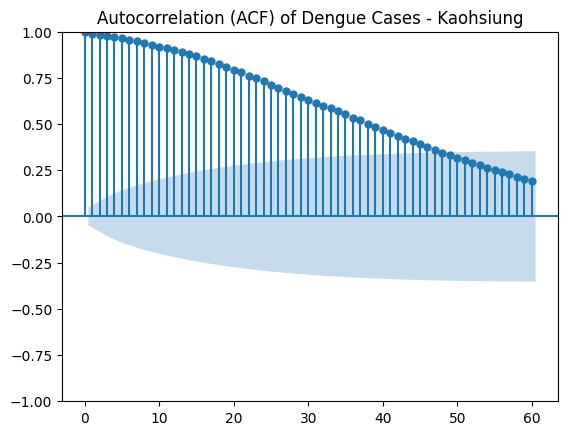

<Figure size 1000x400 with 0 Axes>

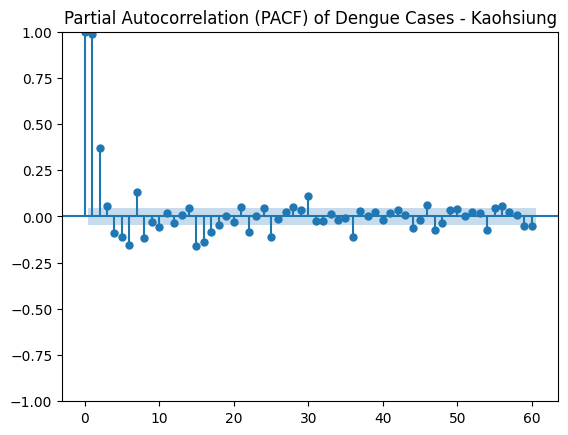

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plot_acf(kaohsiung["Cases"], lags=60)  # 30-day lag window
plt.title("Autocorrelation (ACF) of Dengue Cases - Kaohsiung")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(kaohsiung["Cases"], lags=60)
plt.title("Partial Autocorrelation (PACF) of Dengue Cases - Kaohsiung")
plt.show()

## Cross-Correlation with Environmental Factors

In [ ]:
from statsmodels.tsa.stattools import ccf


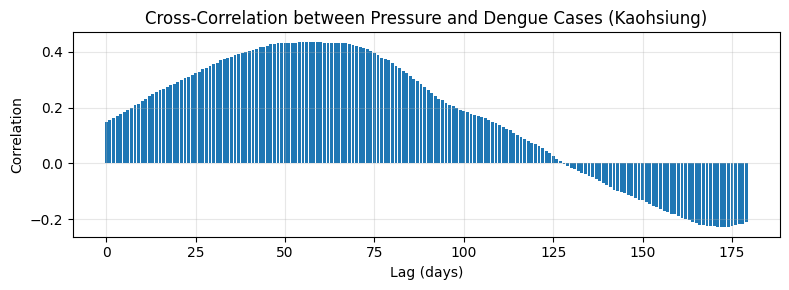

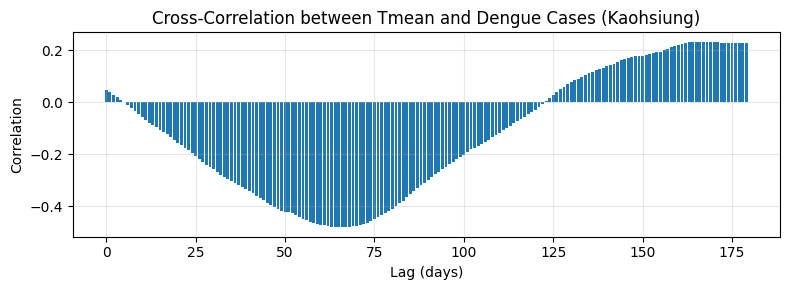

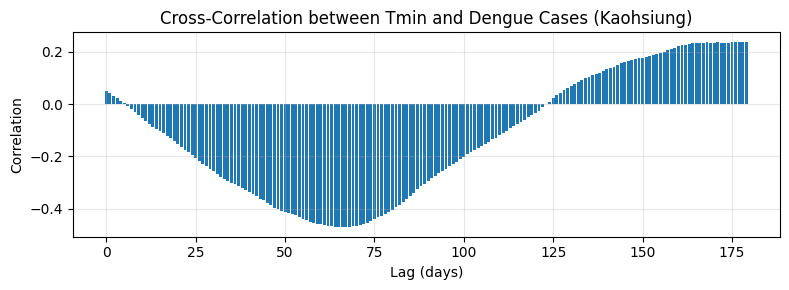

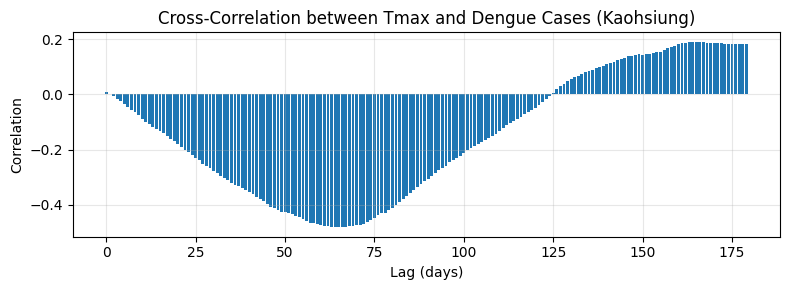

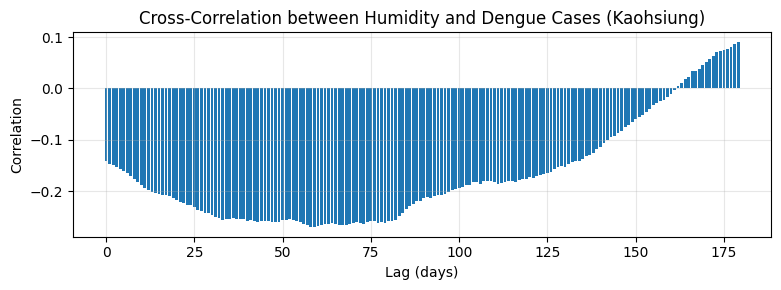

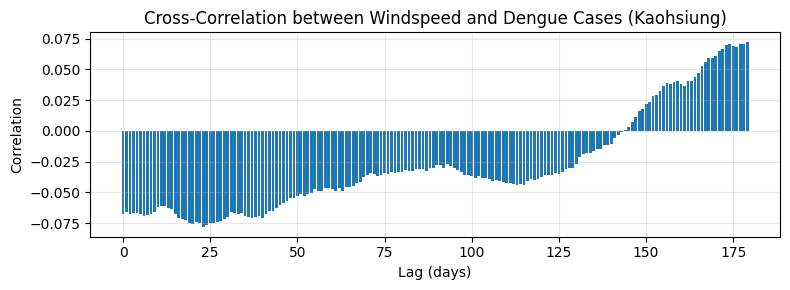

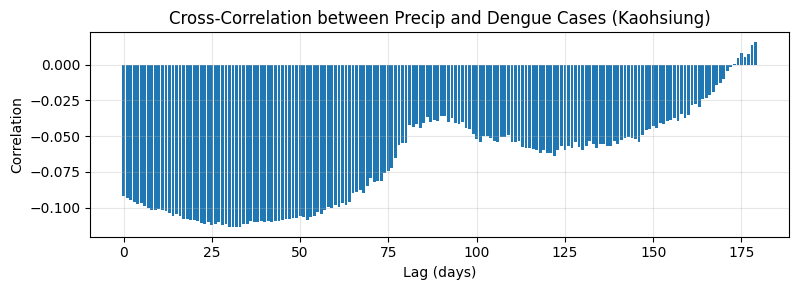

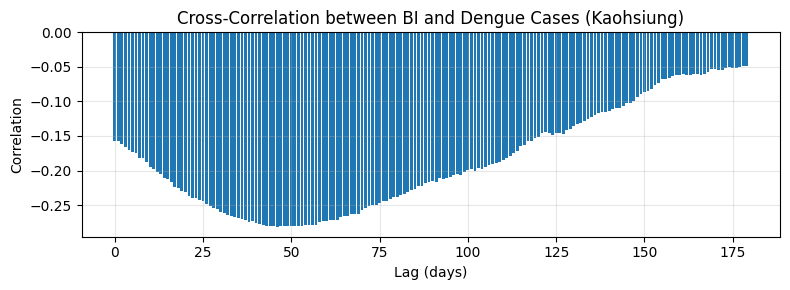

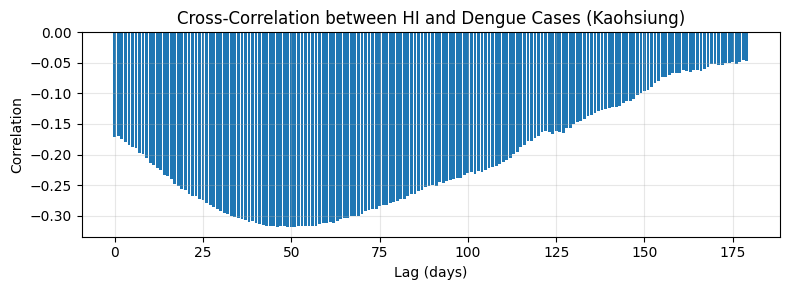

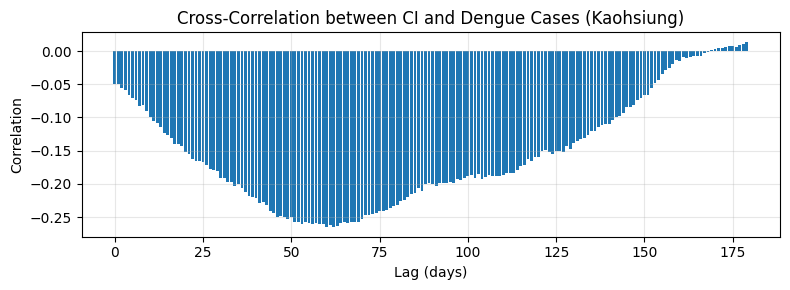

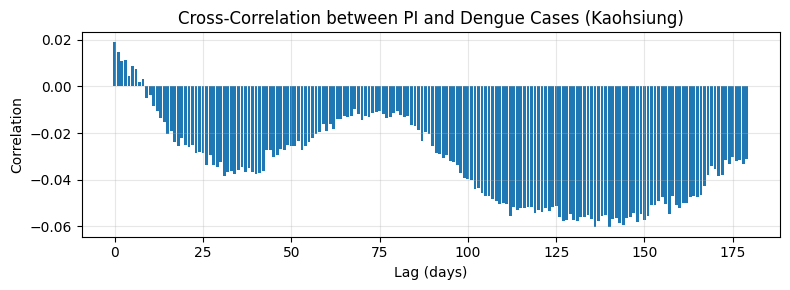

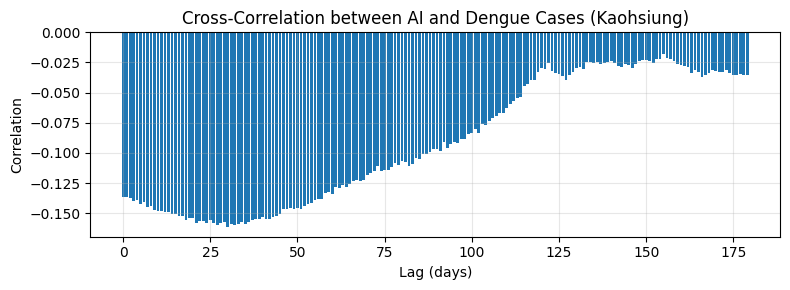

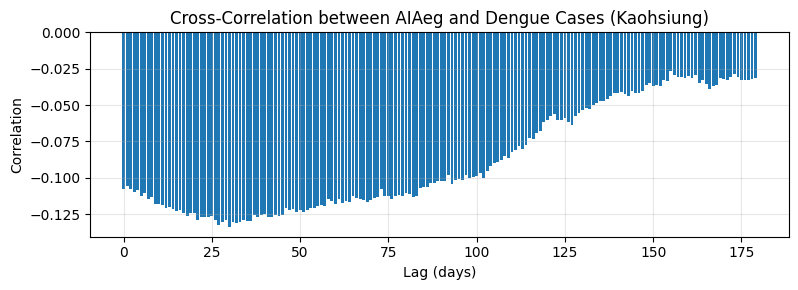

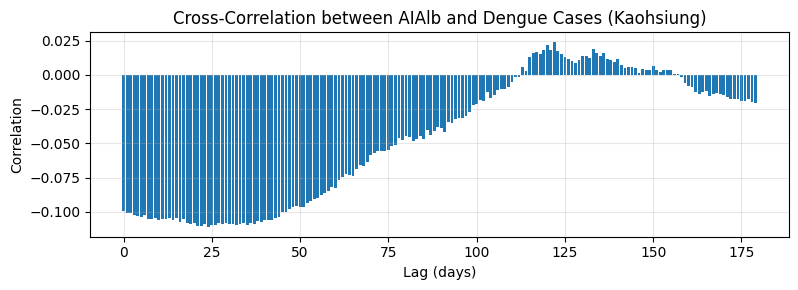

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

variables = ['Pressure', 'Tmean', 'Tmin', 'Tmax', 'Humidity',
             'Windspeed', 'Precip', 'BI', 'HI', 'CI', 'PI', 'AI', 'AIAeg', 'AIAlb']

for var in variables:
    x = kaohsiung[var]
    y = kaohsiung['Cases']
    
    # drop NaNs to avoid errors
    valid = pd.concat([x, y], axis=1).dropna()
    x_valid = valid[var]
    y_valid = valid['Cases']
    
    ccf_values = ccf(x_valid, y_valid)[:180]  # first 180 lags (positive lags)
    plt.figure(figsize=(8,3))
    plt.bar(range(180), ccf_values)
    plt.title(f'Cross-Correlation between {var} and Dengue Cases (Kaohsiung)')
    plt.xlabel('Lag (days)')
    plt.ylabel('Correlation')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



In [ ]:
# Select one city (e.g., Kaohsiung)
kaohsiung = df[df["City"] == "Kaohsiung City"].copy()

kaohsiung['Date'] = pd.to_datetime(kaohsiung['Date'], errors='coerce')
kaohsiung = kaohsiung.set_index('Date').sort_index()

# Resample to weekly frequency (e.g., mean or sum)
# starting from the city-level daily df (e.g., kaohsiung)
weekly = kaohsiung.resample('W').agg({
    'Cases': 'sum',        # count data
    'Precip': 'sum',       # rainfall accumulates
    'Pressure': 'mean',
    'Tmean': 'mean',
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Humidity': 'mean',
    'Windspeed': 'mean',
    'BI': 'mean',
    'HI': 'mean',
    'CI': 'mean',
    'PI': 'mean',
    'AI': 'mean',
    'AIAeg': 'mean',
    'AIAlb': 'mean'
})



In [ ]:
weekly = weekly.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_70521/422326760.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly = weekly.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


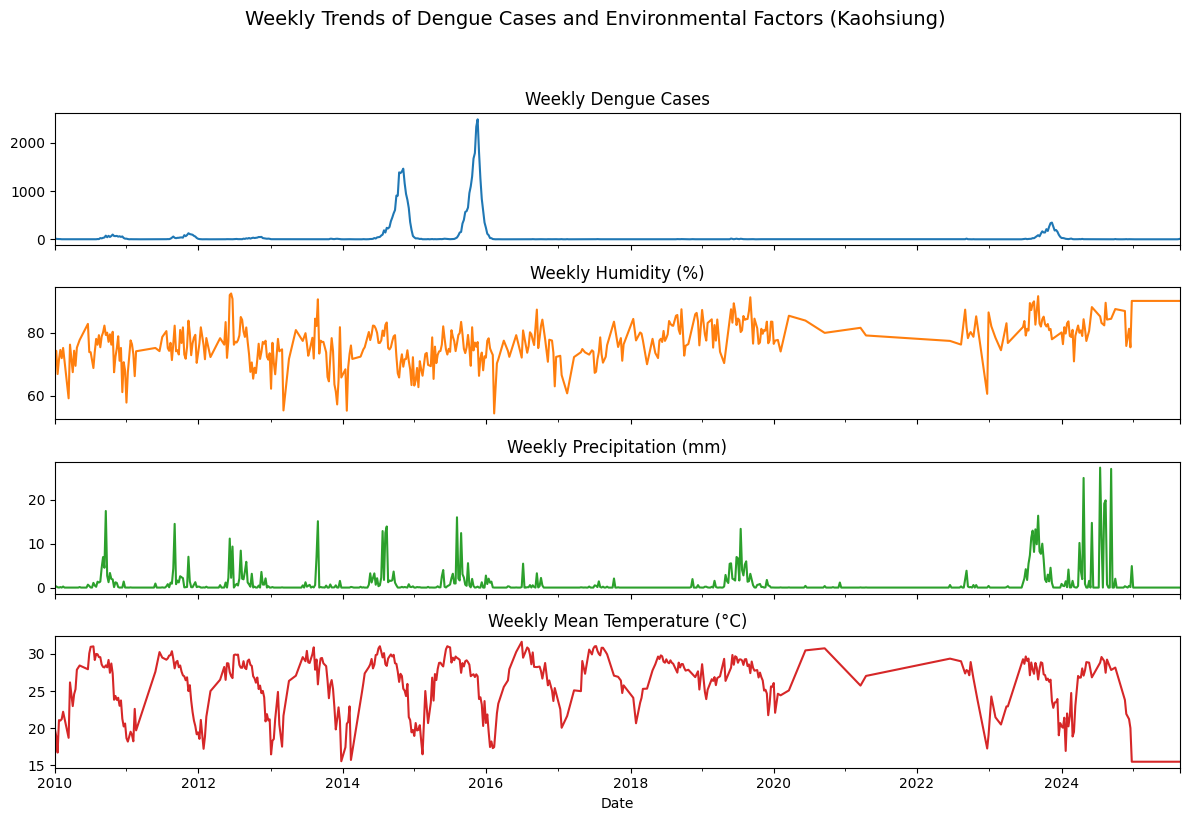

In [ ]:
import matplotlib.pyplot as plt

# Plot weekly trends of dengue cases and key environmental factors
weekly[['Cases', 'Humidity', 'Precip', 'Tmean']].plot(
    subplots=True,
    figsize=(12, 8),
    sharex=True,
    title=[
        'Weekly Dengue Cases',
        'Weekly Humidity (%)',
        'Weekly Precipitation (mm)',
        'Weekly Mean Temperature (°C)'
    ],
    legend=False
)

plt.suptitle('Weekly Trends of Dengue Cases and Environmental Factors (Kaohsiung)', fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()



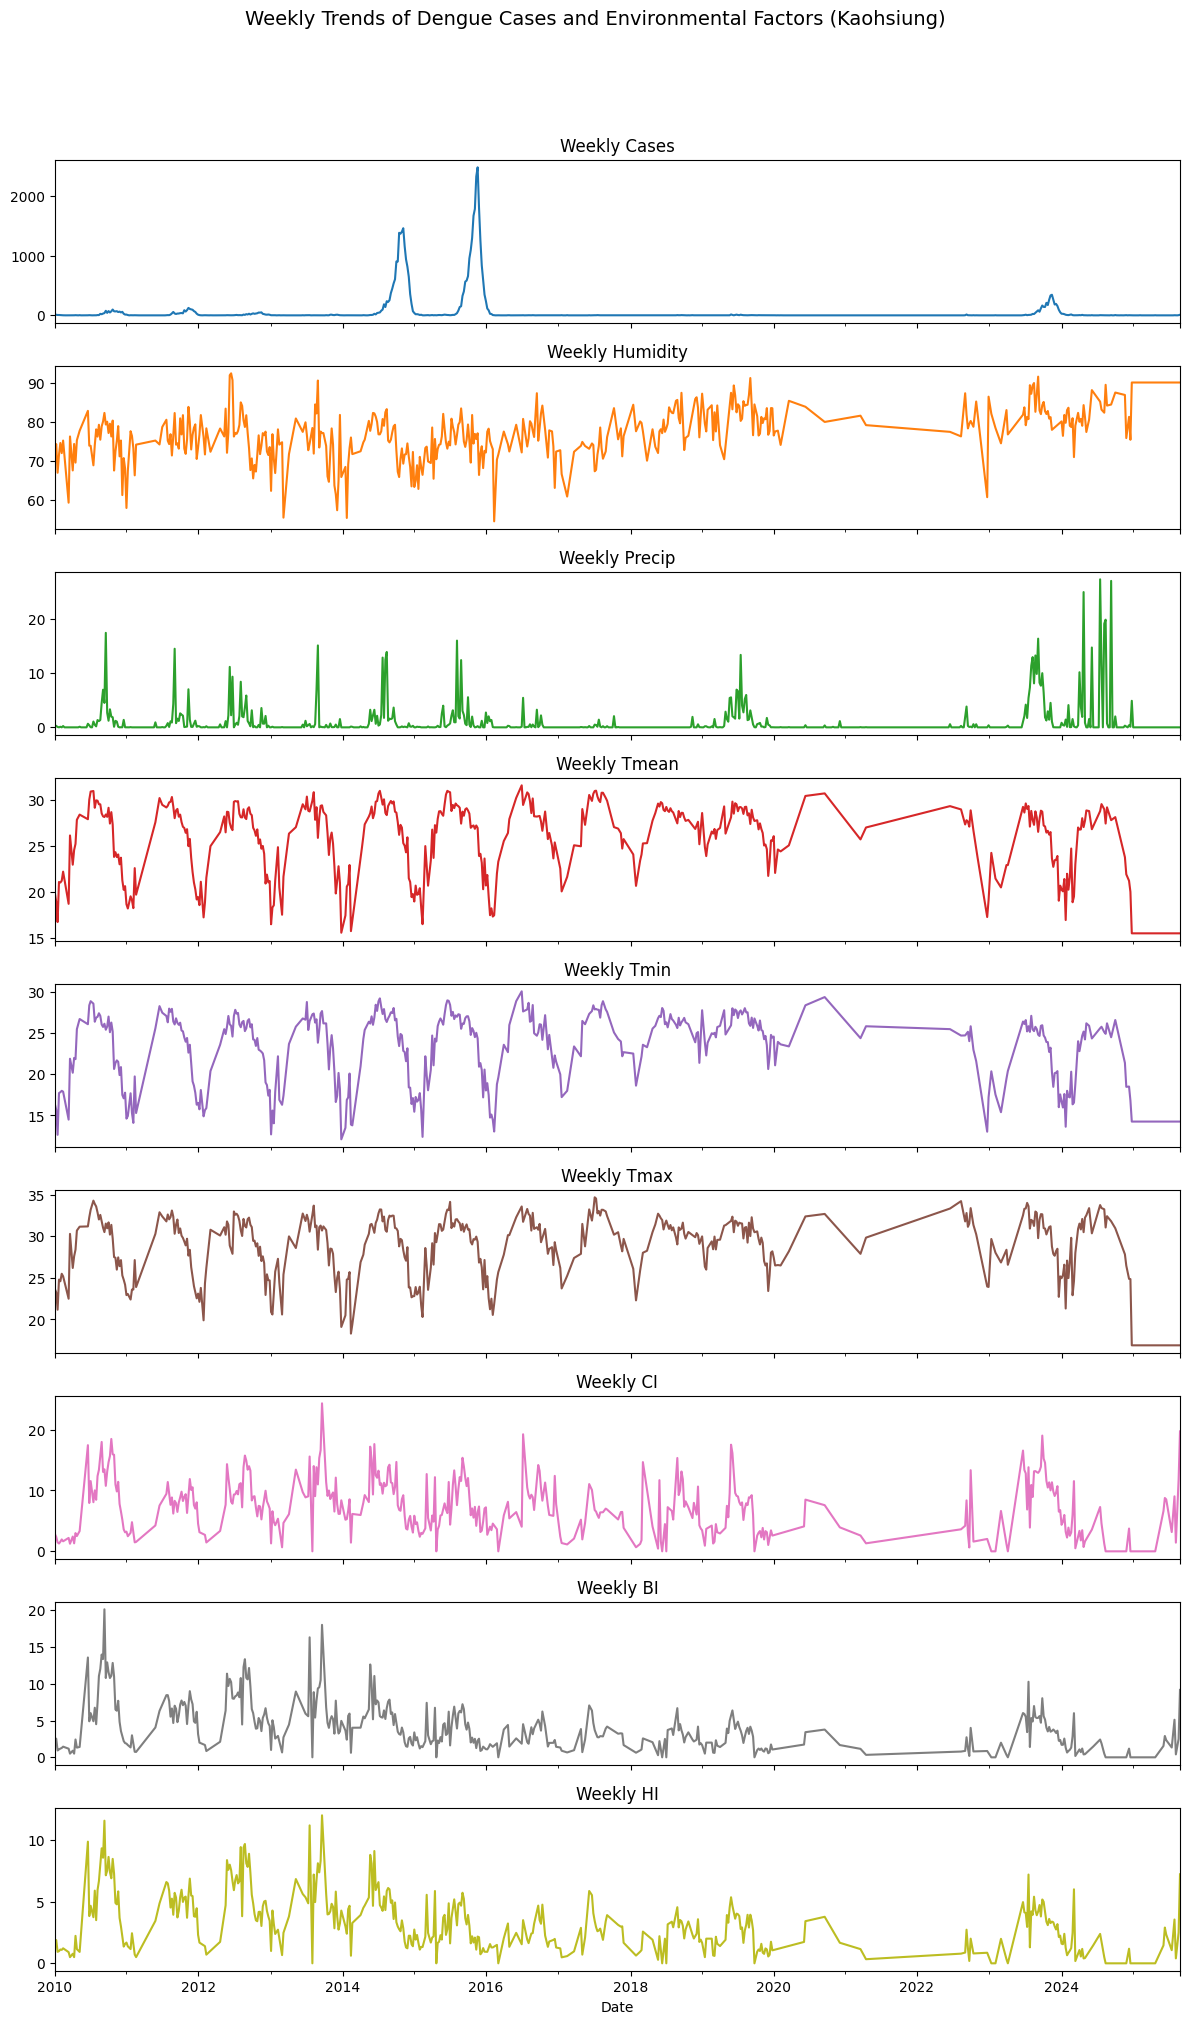

In [ ]:
import matplotlib.pyplot as plt

# Select columns
cols = ['Cases', 'Humidity', 'Precip', 'Tmean', 'Tmin', 'Tmax', 'CI', 'BI', 'HI']

# Only include existing columns in the dataframe
cols = [c for c in cols if c in weekly.columns]

# Plot
weekly[cols].plot(
    subplots=True,
    figsize=(12, 2.2*len(cols)),  # adjust height automatically
    sharex=True,
    legend=False,
    title=[f'Weekly {col}' for col in cols]
)

plt.suptitle('Weekly Trends of Dengue Cases and Environmental Factors (Kaohsiung)',
             fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


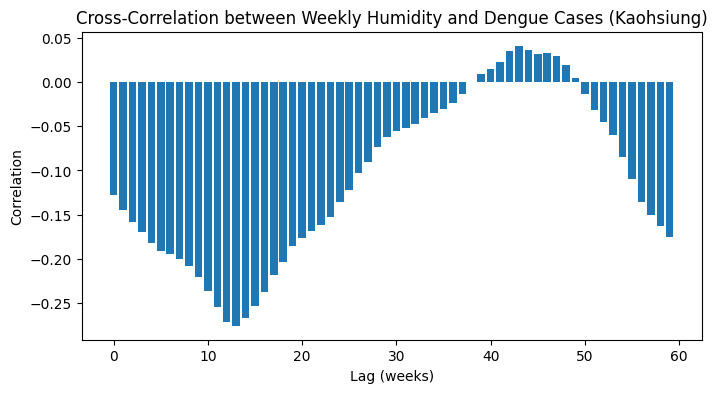

In [ ]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Example: CCF between humidity and dengue cases
x = weekly['Humidity']
y = weekly['Cases']

ccf_values = ccf(x, y)[:60]  # up to 20-week lag

plt.figure(figsize=(8,4))
plt.bar(range(60), ccf_values)
plt.title("Cross-Correlation between Weekly Humidity and Dengue Cases (Kaohsiung)")
plt.xlabel("Lag (weeks)")
plt.ylabel("Correlation")
plt.show()


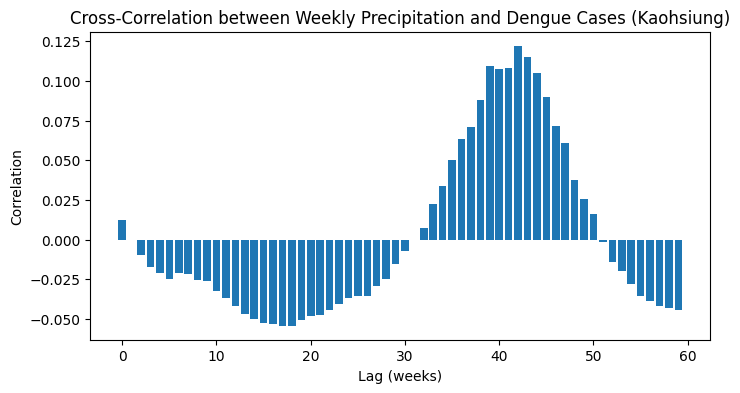

In [ ]:
weekly = (weekly - weekly.mean()) / weekly.std()
x = weekly['Precip']
y = weekly['Cases']

ccf_values = ccf(x, y)[:60]
plt.figure(figsize=(8,4))
plt.bar(range(60), ccf_values)
plt.title("Cross-Correlation between Weekly Precipitation and Dengue Cases (Kaohsiung)")
plt.xlabel("Lag (weeks)")
plt.ylabel("Correlation")
plt.show()



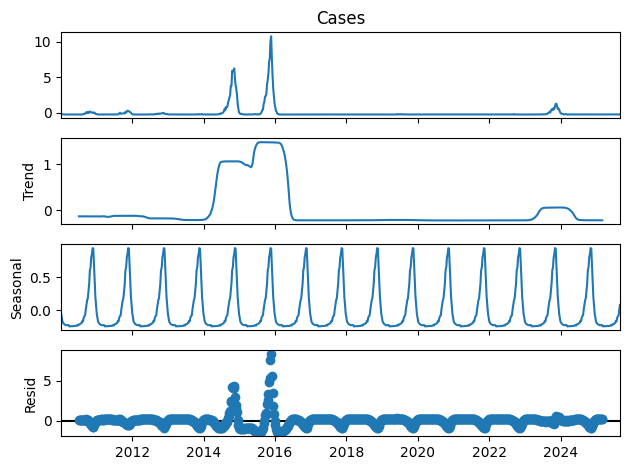

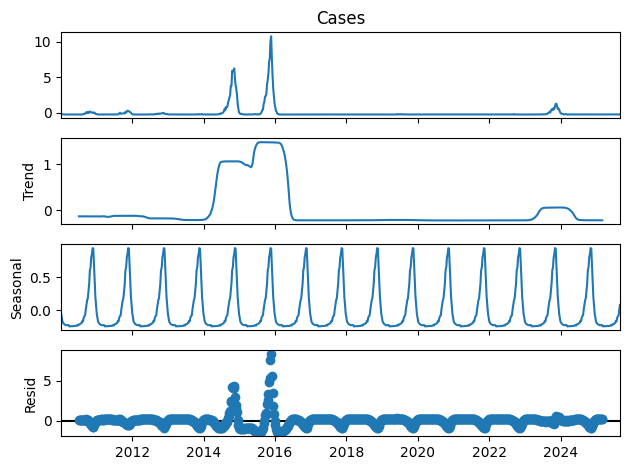

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(weekly['Cases'], model='additive', period=52).plot()


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(weekly[['Cases', 'Precip']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7355  , p=0.0536  , df_denom=814, df_num=1
ssr based chi2 test:   chi2=3.7492  , p=0.0528  , df=1
likelihood ratio test: chi2=3.7407  , p=0.0531  , df=1
parameter F test:         F=3.7355  , p=0.0536  , df_denom=814, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1297  , p=0.3236  , df_denom=811, df_num=2
ssr based chi2 test:   chi2=2.2733  , p=0.3209  , df=2
likelihood ratio test: chi2=2.2702  , p=0.3214  , df=2
parameter F test:         F=1.1297  , p=0.3236  , df_denom=811, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5111  , p=0.2102  , df_denom=808, df_num=3
ssr based chi2 test:   chi2=4.5725  , p=0.2059  , df=3
likelihood ratio test: chi2=4.5597  , p=0.2070  , df=3
parameter F test:         F=1.5111  , p=0.2102  , df_denom=808, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8061  , p=0.1256  

{np.int64(1): ({'ssr_ftest': (np.float64(3.7354608702873557),
    np.float64(0.05361556096929998),
    np.float64(814.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(3.7492279250918545),
    np.float64(0.05283190962265707),
    np.int64(1)),
   'lrtest': (np.float64(3.7406515155612396),
    np.float64(0.053103735259790105),
    np.int64(1)),
   'params_ftest': (np.float64(3.735460870286028),
    np.float64(0.05361556096934536),
    np.float64(814.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.1297033804834458),
    np.float64(0.3236370368922644),
    np.float64(811.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.2733365190493013),
    np.float64(0.32088635284374323),
    np.int64(2)),
   'lrtest': (np.float64(2.270175685533559),
    np.float64(0.321393887966016),
    np.int64(2)),
   'params_ftest': (np.float64(1.1297033804834375),
    np.float64(0.3236370368922644),
    np.float64(811.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
   

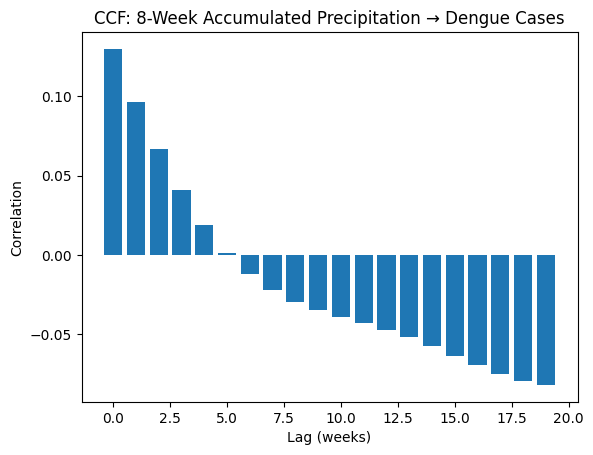

In [ ]:
# 1) Make the rolling sum (if you haven’t already)
weekly['Precip_8W'] = weekly['Precip'].rolling(window=8, min_periods=8).sum()

# 2) Align both series on the SAME index and drop any remaining NaNs
pair = weekly[['Precip_8W', 'Cases']].dropna(how='any')

# 3) (Optional but recommended) standardize so scales are comparable
from scipy.stats import zscore
x = zscore(pair['Precip_8W'].to_numpy())
y = zscore(pair['Cases'].to_numpy())

# 4) Compute CCF (positive lag k means Precip_8W leads Cases by k weeks)
from statsmodels.tsa.stattools import ccf
nlags = 20
ccf_values = ccf(x, y)[:nlags]

# 5) Plot
import matplotlib.pyplot as plt
plt.bar(range(nlags), ccf_values)
plt.xlabel('Lag (weeks)'); plt.ylabel('Correlation')
plt.title('CCF: 8-Week Accumulated Precipitation → Dengue Cases')
plt.show()


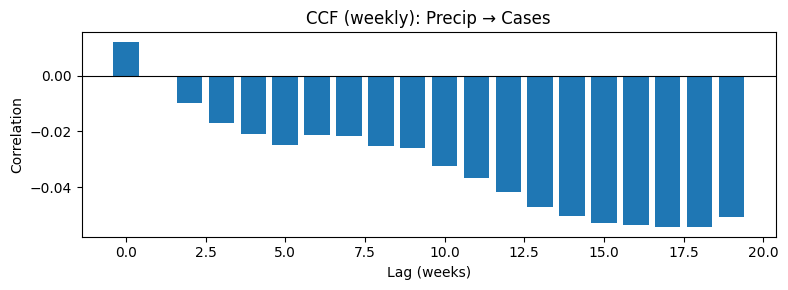

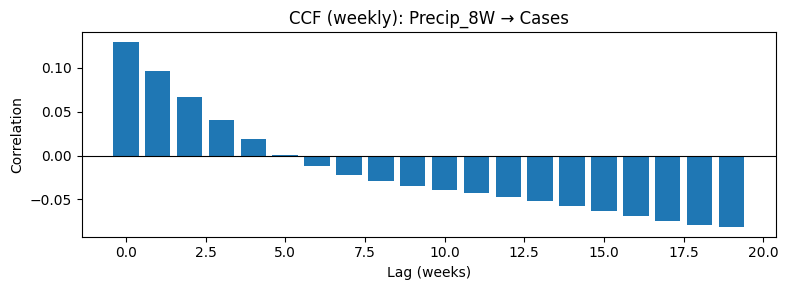

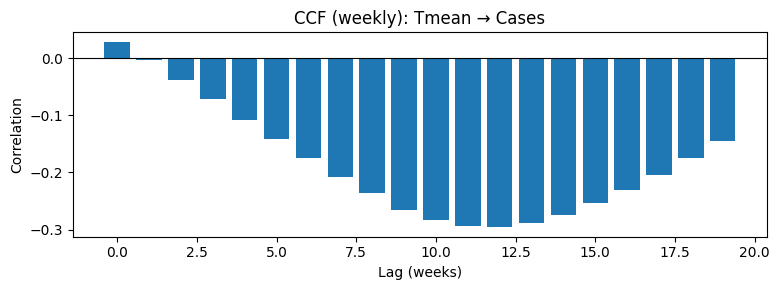

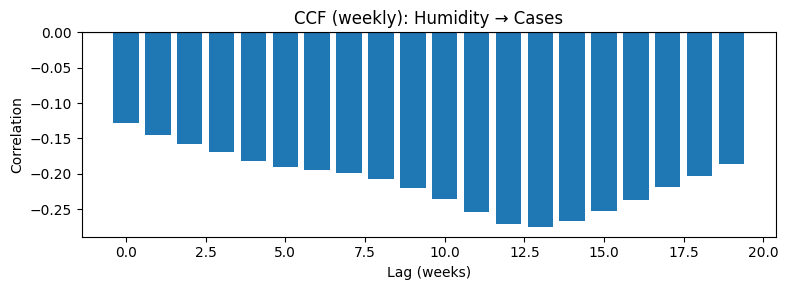

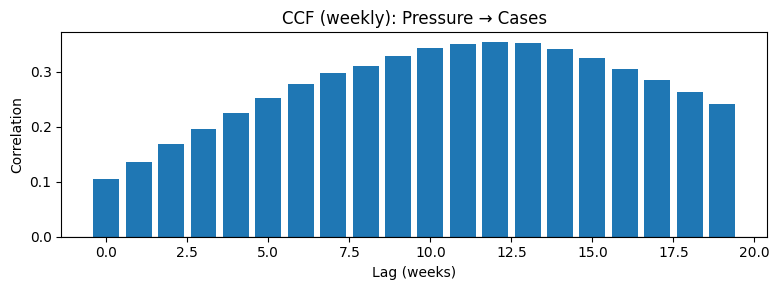

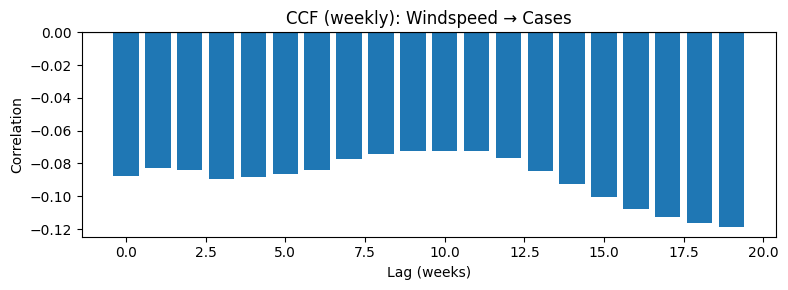

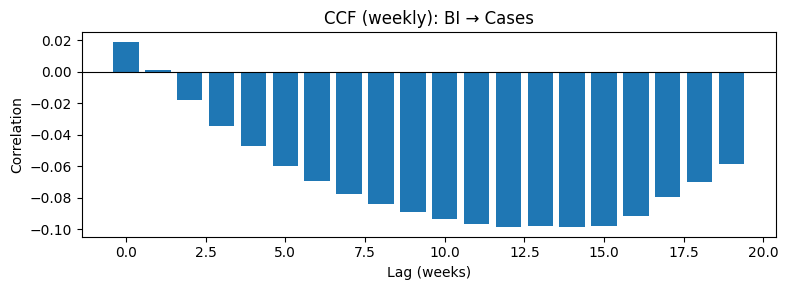

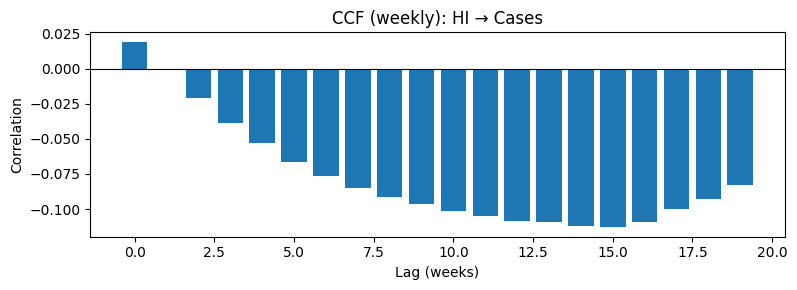

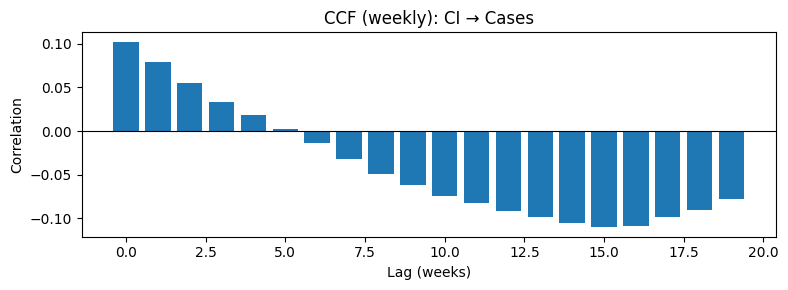

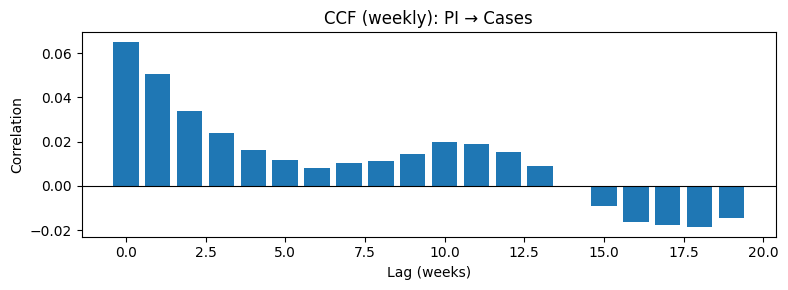

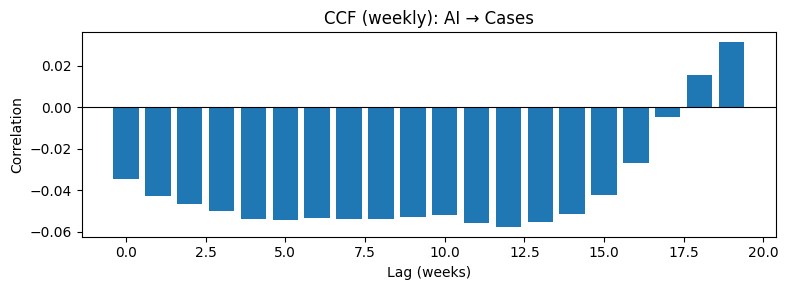

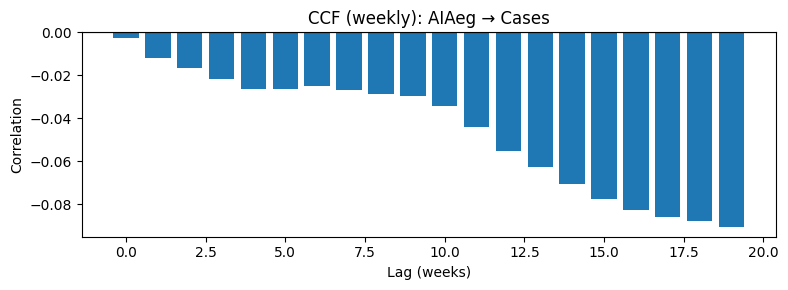

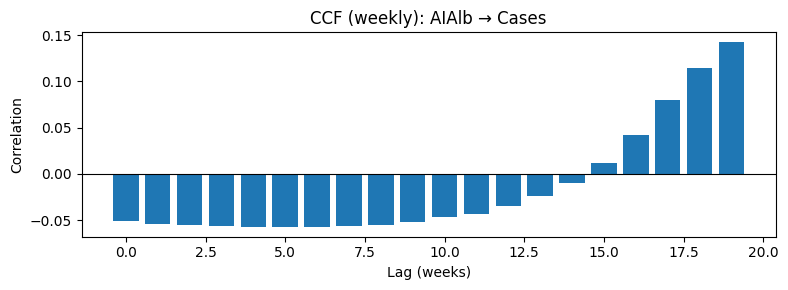

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from statsmodels.tsa.stattools import ccf

# ---------- 0) Make sure we have a weekly dataframe ----------
if 'weekly' not in globals():
    # assumes you still have daily df with Date index and a 'City' column
    city = "Kaohsiung City"
    daily_city = df[df["City"] == city].copy()
    weekly = daily_city.resample('W').agg({
        'Cases':'sum','Precip':'sum','Tmean':'mean','Humidity':'mean',
        'Pressure':'mean','Windspeed':'mean','BI':'mean','HI':'mean',
        'CI':'mean','PI':'mean','AI':'mean','AIAeg':'mean','AIAlb':'mean'
    })

# ---------- 1) helper: clean a column into numeric, aligned with Cases ----------
def _prep_pair(weekly, feature, target='Cases'):
    if feature not in weekly.columns:
        return None, "missing column"
    # coerce to numeric
    s = pd.to_numeric(weekly[feature], errors='coerce')
    t = pd.to_numeric(weekly[target],  errors='coerce')
    # align & drop NaNs
    pair = pd.concat([s.rename('x'), t.rename('y')], axis=1).dropna()
    if len(pair) < 30:
        return None, f"too few points after dropna (len={len(pair)})"
    # constant check (zscore would be NaN)
    if pair['x'].std(ddof=0) == 0 or pair['y'].std(ddof=0) == 0:
        return None, "constant series (std=0)"
    return pair, None

# ---------- 2) compute Precip_8W ----------
if 'Precip_8W' not in weekly.columns:
    weekly['Precip_8W'] = weekly['Precip'].rolling(8, min_periods=8).sum()

# ---------- 3) features to plot ----------
features = ['Precip', 'Precip_8W', 'Tmean', 'Humidity', 'Pressure', 'Windspeed',
            'BI', 'HI', 'CI', 'PI', 'AI', 'AIAeg', 'AIAlb']

nlags = 20

def plot_ccf(feature, max_lag=nlags):
    pair, err = _prep_pair(weekly, feature)
    if err:
        print(f"⚠️  Skipping {feature}: {err}")
        return
    x = zscore(pair['x'].to_numpy())
    y = zscore(pair['y'].to_numpy())
    # ensure equal length (paranoia)
    n = min(len(x), len(y))
    x, y = x[:n], y[:n]
    vals = ccf(x, y)[:max_lag]
    plt.figure(figsize=(8,3))
    plt.bar(range(max_lag), vals)
    plt.axhline(0, color='k', lw=0.8)
    plt.xlabel('Lag (weeks)'); plt.ylabel('Correlation')
    plt.title(f'CCF (weekly): {feature} → Cases')
    plt.tight_layout(); plt.show()

# ---------- 4) run ----------
for f in features:
    plot_ccf(f)


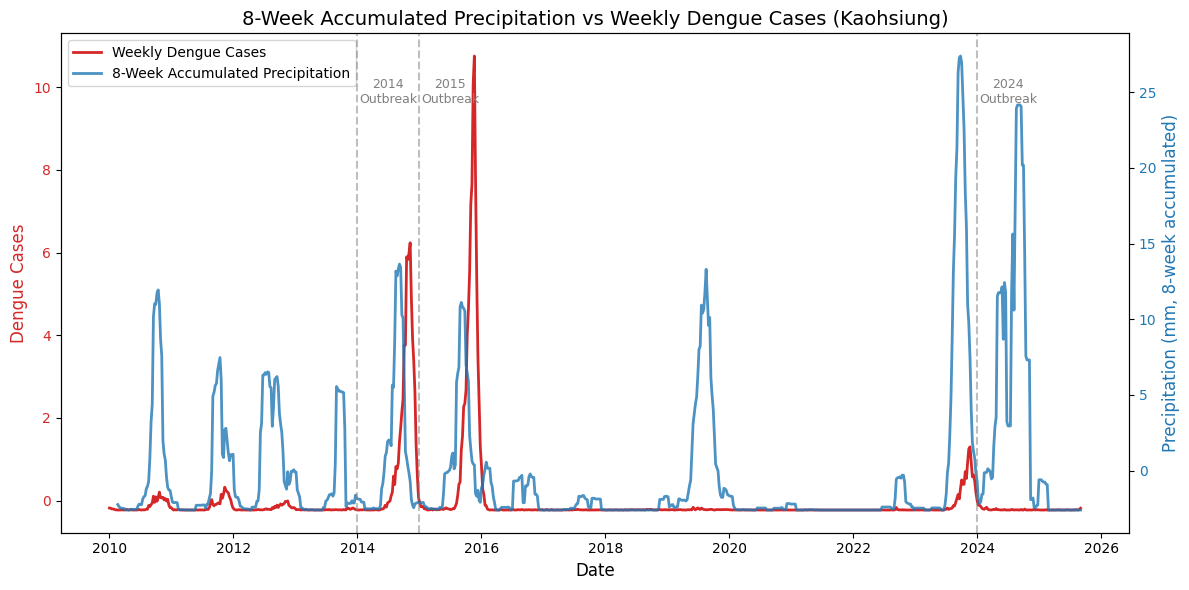

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

weekly['Precip_8W'] = weekly['Precip'].rolling(window=8, min_periods=8).sum()

# Plot Dengue Cases (left y-axis)
ax1.plot(weekly.index, weekly['Cases'], color='tab:red', label='Weekly Dengue Cases', linewidth=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Dengue Cases', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot 8-Week Accumulated Precipitation (right y-axis)
ax2 = ax1.twinx()
ax2.plot(weekly.index, weekly['Precip_8W'], color='tab:blue', label='8-Week Accumulated Precipitation', linewidth=2, alpha=0.8)
ax2.set_ylabel('Precipitation (mm, 8-week accumulated)', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add outbreak year markers (you can adjust years based on your dataset)
outbreak_years = [2014, 2015, 2024]
for year in outbreak_years:
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.5)
    ax1.text(pd.Timestamp(f'{year}-07-01'), ax1.get_ylim()[1]*0.85,
             f'{year}\nOutbreak', color='gray', ha='center', fontsize=9)

# Titles and layout
plt.title('8-Week Accumulated Precipitation vs Weekly Dengue Cases (Kaohsiung)', fontsize=14)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


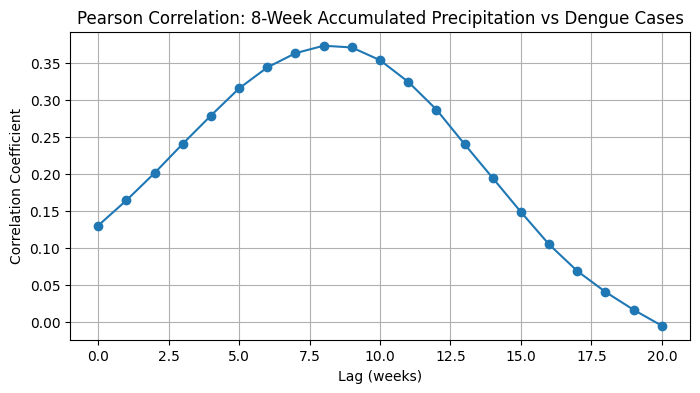

Highest correlation at lag 8 weeks: r = 0.373


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Align and drop missing data
data = weekly[['Precip_8W', 'Cases']].dropna()

# Compute correlations for lags 0–20 weeks
max_lag = 20
corrs = []
lags = range(max_lag + 1)

for lag in lags:
    # Shift precipitation forward so we test if rainfall LEADS cases
    corr, _ = pearsonr(data['Precip_8W'].shift(lag).dropna(), data['Cases'][lag:])
    corrs.append(corr)

# Plot correlation vs. lag
plt.figure(figsize=(8,4))
plt.plot(lags, corrs, marker='o')
plt.title('Pearson Correlation: 8-Week Accumulated Precipitation vs Dengue Cases')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

# Show lag with maximum correlation
best_lag = np.argmax(corrs)
print(f"Highest correlation at lag {best_lag} weeks: r = {corrs[best_lag]:.3f}")


In [ ]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def corr_by_lag(df, feature, target='Cases', max_lag=20, window=None, window_op='mean'):
    """
    Compute Pearson correlation between a feature and target at multiple lags.
    Optionally apply rolling window (sum or mean) to the feature.
    """
    s = df[feature].copy()

    # Apply rolling accumulation or average if specified
    if window is not None:
        if window_op == 'sum':
            s = s.rolling(window=window, min_periods=window).sum()
        elif window_op == 'mean':
            s = s.rolling(window=window, min_periods=window).mean()
        else:
            raise ValueError("window_op must be 'sum' or 'mean'")

    results = []
    for lag in range(max_lag + 1):
        pair = pd.concat([s.shift(lag), df[target]], axis=1).dropna()
        if len(pair) > 3:
            r, p = pearsonr(pair.iloc[:, 0], pair.iloc[:, 1])
            results.append((lag, r, p))
        else:
            results.append((lag, np.nan, np.nan))

    res_df = pd.DataFrame(results, columns=['Lag (weeks)', 'r', 'p'])

    # Plot
    plt.figure(figsize=(8,4))
    plt.plot(res_df['Lag (weeks)'], res_df['r'], marker='o')
    ttl = f"Pearson Correlation: {feature}"
    if window:
        ttl += f" ({window}-week {window_op})"
    plt.title(ttl)
    plt.xlabel('Lag (weeks)')
    plt.ylabel('Correlation (r)')
    plt.grid(True)
    plt.show()

    # Print best lag
    best = res_df.loc[res_df['r'].idxmax()]
    print(f"🔹 {feature}: Best lag = {int(best['Lag (weeks)'])} weeks, r = {best['r']:.3f}, p = {best['p']:.4f}")
    return res_df



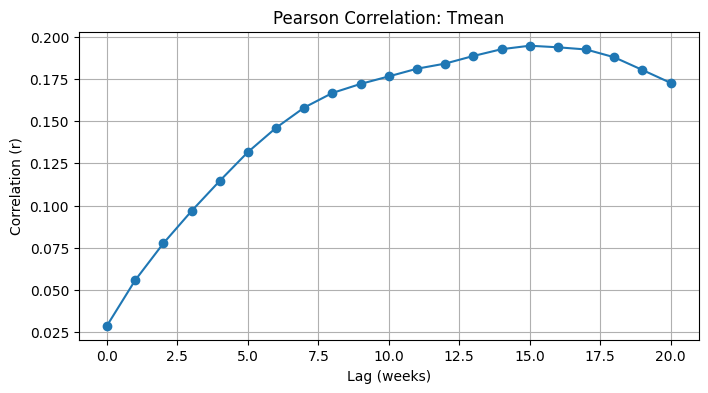

🔹 Tmean: Best lag = 15 weeks, r = 0.195, p = 0.0000


,Lag (weeks),r,p
0,0,0.028929,4.086309e-01
1,1,0.055807,1.109508e-01
2,2,0.077642,2.656554e-02
3,3,0.096759,5.700358e-03
4,4,0.114595,1.055700e-03
5,5,0.131652,1.669342e-04
6,6,0.146020,2.954887e-05
7,7,0.158009,6.146345e-06
8,8,0.166638,1.854691e-06
9,9,0.171994,8.602720e-07


In [ ]:
corr_by_lag(weekly, 'Tmean', max_lag=20)



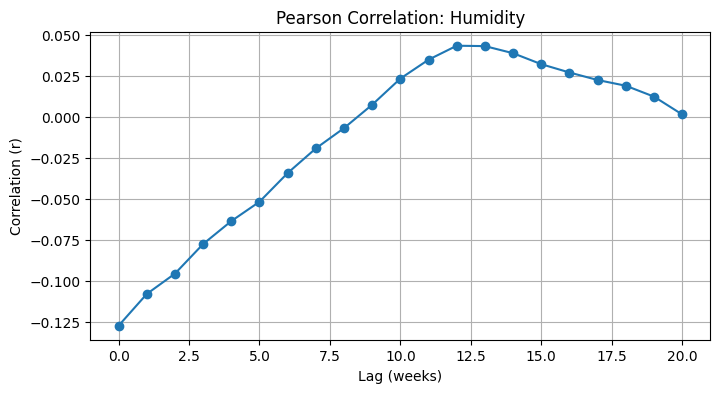

🔹 Humidity: Best lag = 12 weeks, r = 0.044, p = 0.2159


,Lag (weeks),r,p
0,0,-0.127567,0.000254
1,1,-0.108157,0.001963
2,2,-0.095715,0.006214
3,3,-0.077611,0.026720
4,4,-0.063588,0.069792
5,5,-0.051773,0.140234
6,6,-0.034211,0.330234
7,7,-0.019141,0.586235
8,8,-0.006730,0.848344
9,9,0.007578,0.829599


In [ ]:
corr_by_lag(weekly, 'Humidity', max_lag=20)


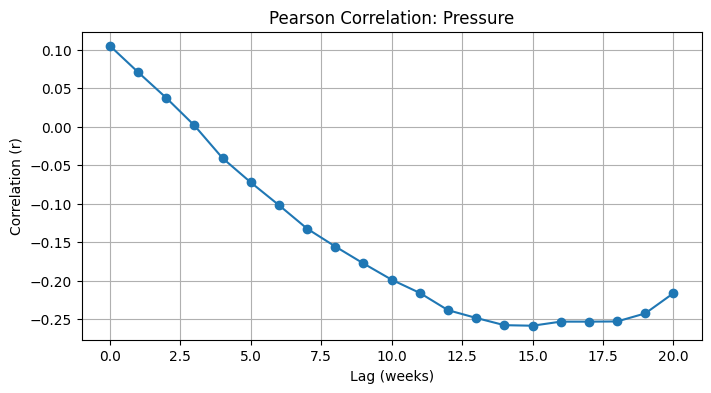

🔹 Pressure: Best lag = 0 weeks, r = 0.105, p = 0.0026


,Lag (weeks),r,p
0,0,0.105038,2.630700e-03
1,1,0.070781,4.311691e-02
2,2,0.037409,2.858142e-01
3,3,0.001588,9.638974e-01
4,4,-0.040840,2.444641e-01
5,5,-0.072310,3.927224e-02
6,6,-0.101850,3.668218e-03
7,7,-0.132352,1.568654e-04
8,8,-0.155526,8.724136e-06
9,9,-0.177552,3.720508e-07


In [ ]:
corr_by_lag(weekly, 'Pressure', max_lag=20)


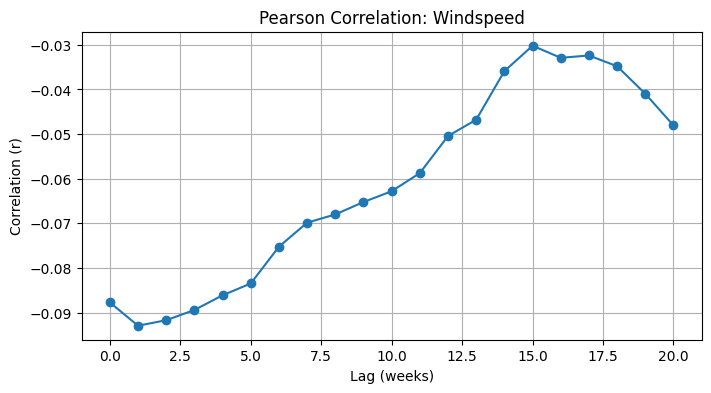

🔹 Windspeed: Best lag = 15 weeks, r = -0.030, p = 0.3929


,Lag (weeks),r,p
0,0,-0.087731,0.012067
1,1,-0.092954,0.007846
2,2,-0.091717,0.008755
3,3,-0.089427,0.010644
4,4,-0.086137,0.013958
5,5,-0.083485,0.017270
6,6,-0.075244,0.032044
7,7,-0.069856,0.046733
8,8,-0.068005,0.053027
9,9,-0.065231,0.063672


In [ ]:
corr_by_lag(weekly, 'Windspeed', max_lag=20)


In [ ]:
vector_indices = ['BI','HI','CI','PI','AI','AIAeg','AIAlb']
weekly[vector_indices] = weekly[vector_indices].interpolate(method='linear')


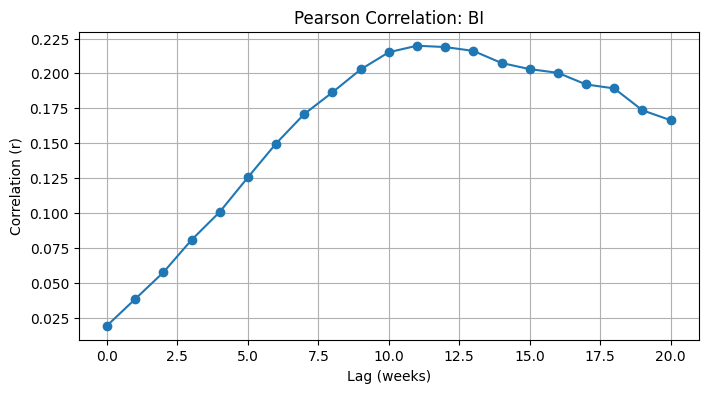

🔹 BI: Best lag = 11 weeks, r = 0.220, p = 0.0000


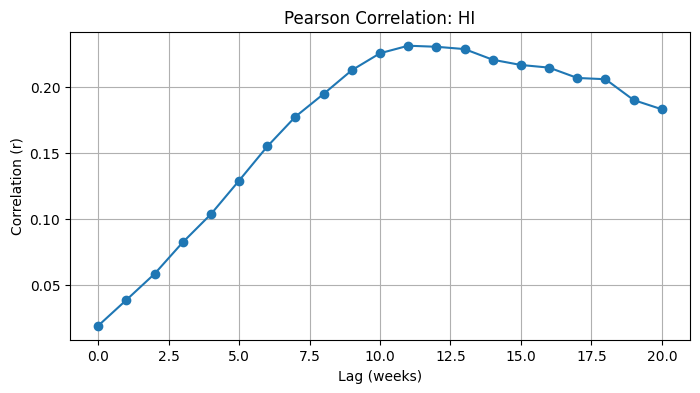

🔹 HI: Best lag = 11 weeks, r = 0.231, p = 0.0000


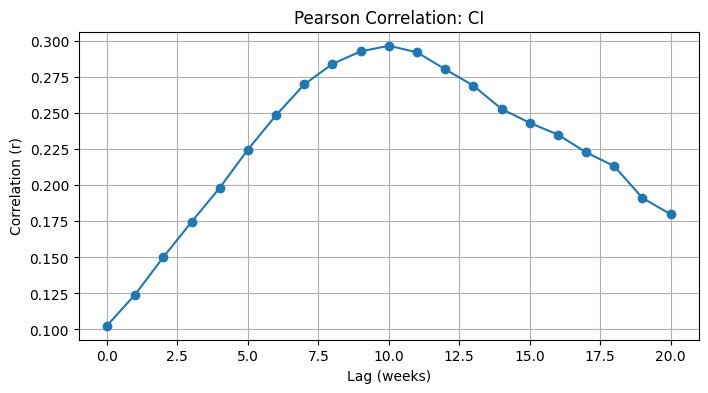

🔹 CI: Best lag = 10 weeks, r = 0.297, p = 0.0000


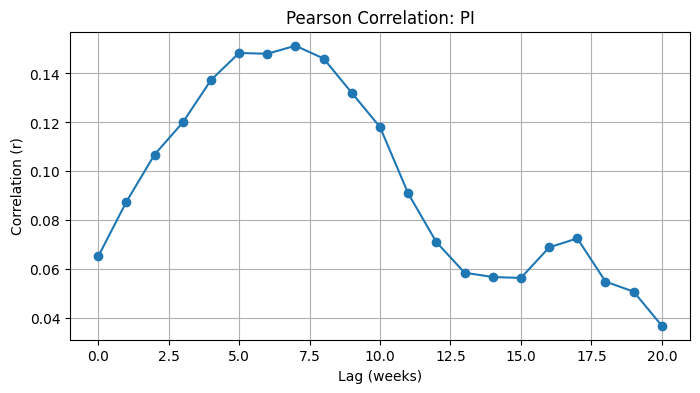

🔹 PI: Best lag = 7 weeks, r = 0.151, p = 0.0000


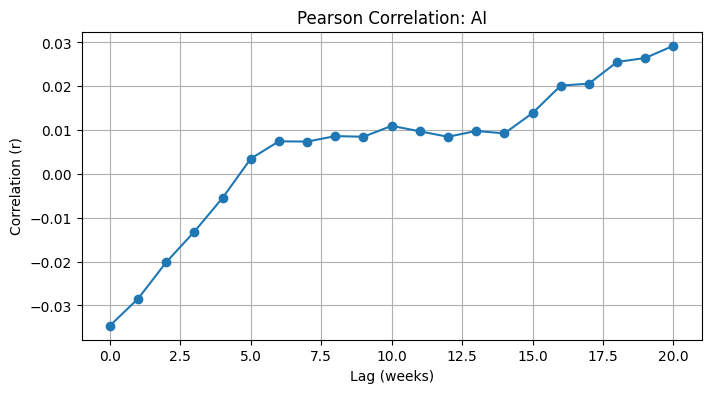

🔹 AI: Best lag = 20 weeks, r = 0.029, p = 0.4094


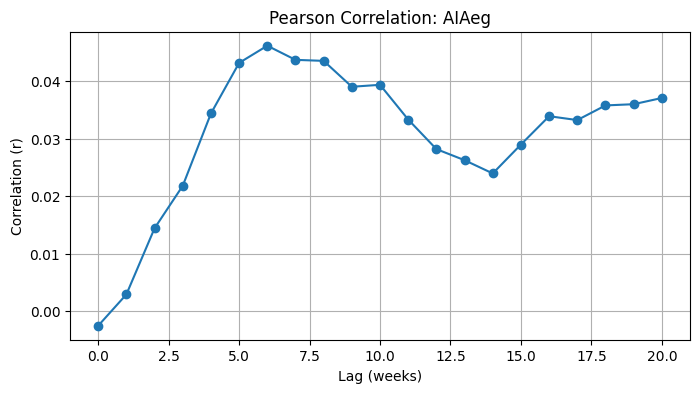

🔹 AIAeg: Best lag = 6 weeks, r = 0.046, p = 0.1892


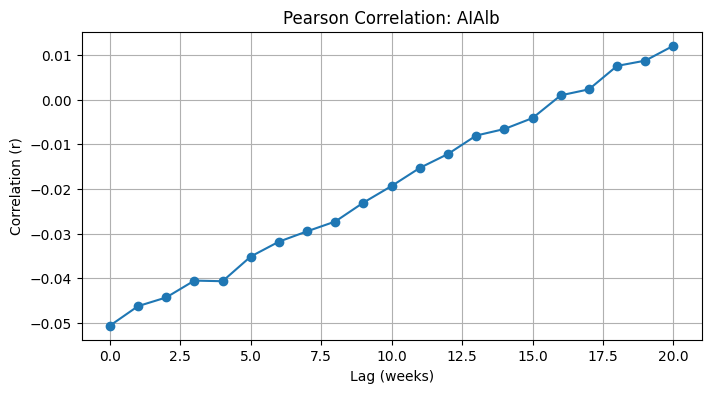

🔹 AIAlb: Best lag = 20 weeks, r = 0.012, p = 0.7339


In [ ]:
for idx in vector_indices:
    res = corr_by_lag(weekly, idx, max_lag=20)


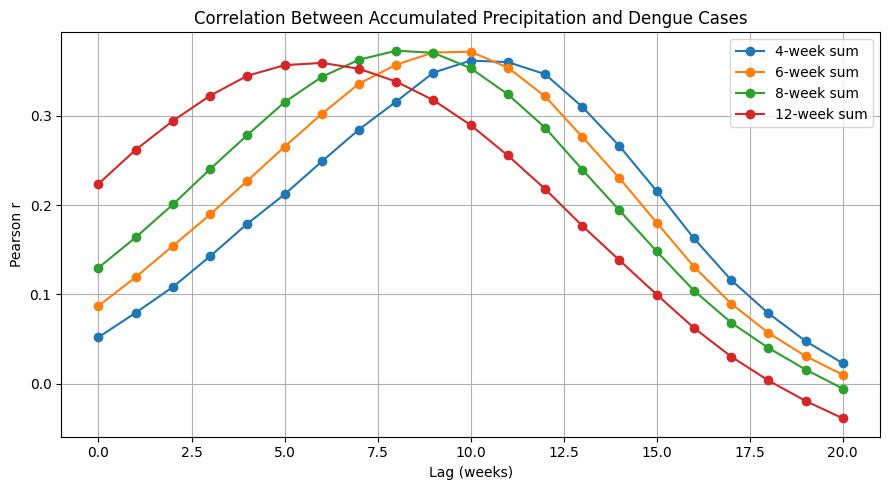

  Accumulation Window  Best Lag (weeks)  Max r  p-value
0          4-week sum                10  0.362      0.0
1          6-week sum                10  0.372      0.0
2          8-week sum                 8  0.373      0.0
3         12-week sum                 6  0.360      0.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# --------------------------
# 1. Create rolling sums
# --------------------------
windows = [4, 6, 8, 12]

for w in windows:
    weekly[f'Precip_{w}W'] = weekly['Precip'].rolling(window=w, min_periods=w).sum()

# --------------------------
# 2. Function: correlation vs lag
# --------------------------
def corr_by_lag(df, feature, target='Cases', max_lag=20):
    """Return list of (lag, r, p) for a feature vs. target."""
    results = []
    for lag in range(max_lag + 1):
        pair = pd.concat([df[feature].shift(lag), df[target]], axis=1).dropna()
        if len(pair) > 3:
            r, p = pearsonr(pair.iloc[:,0], pair.iloc[:,1])
            results.append((lag, r, p))
        else:
            results.append((lag, np.nan, np.nan))
    return pd.DataFrame(results, columns=['Lag (weeks)', 'r', 'p'])

# --------------------------
# 3. Compute & visualize
# --------------------------
max_lag = 20
results_dict = {}

plt.figure(figsize=(9,5))
for w in windows:
    res = corr_by_lag(weekly, f'Precip_{w}W', max_lag=max_lag)
    results_dict[w] = res
    plt.plot(res['Lag (weeks)'], res['r'], marker='o', label=f'{w}-week sum')

plt.title('Correlation Between Accumulated Precipitation and Dengue Cases')
plt.xlabel('Lag (weeks)')
plt.ylabel('Pearson r')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 4. Summarize best lag for each window
# --------------------------
summary = []
for w, res in results_dict.items():
    best_idx = res['r'].idxmax()
    best = res.loc[best_idx]
    summary.append((f'{w}-week sum', int(best['Lag (weeks)']), round(best['r'], 3), round(best['p'], 4)))

summary_df = pd.DataFrame(summary, columns=['Accumulation Window', 'Best Lag (weeks)', 'Max r', 'p-value'])
print(summary_df)


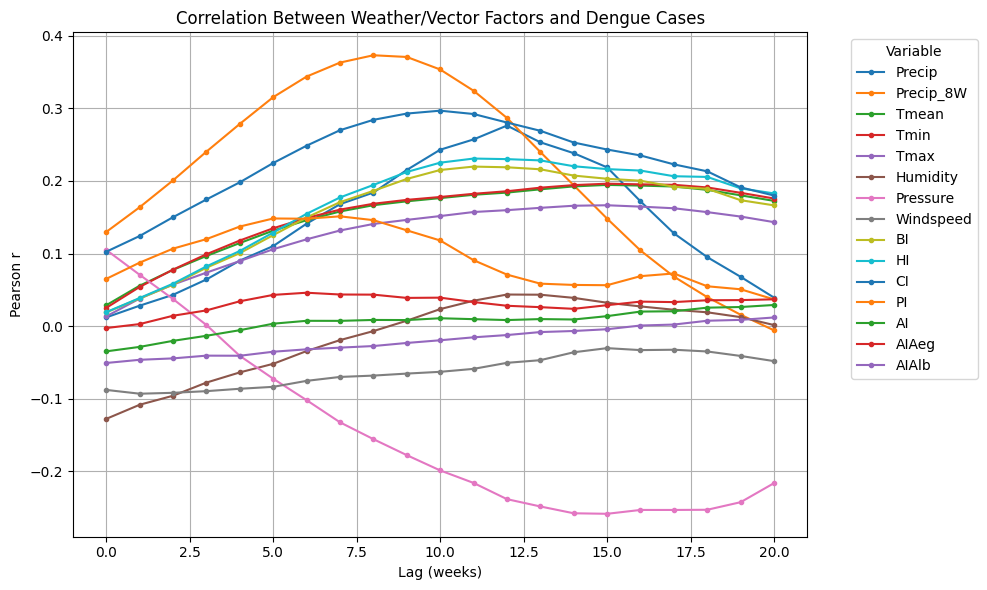

     Variable  Best Lag (weeks)  Max r  p-value
1   Precip_8W                 8  0.373   0.0000
10         CI                10  0.297   0.0000
0      Precip                12  0.276   0.0000
9          HI                11  0.231   0.0000
8          BI                11  0.220   0.0000
3        Tmin                15  0.196   0.0000
2       Tmean                15  0.195   0.0000
4        Tmax                15  0.167   0.0000
11         PI                 7  0.151   0.0000
6    Pressure                 0  0.105   0.0026
13      AIAeg                 6  0.046   0.1892
5    Humidity                12  0.044   0.2159
12         AI                20  0.029   0.4094
14      AIAlb                20  0.012   0.7339
7   Windspeed                15 -0.030   0.3929


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

weekly['Precip_8W'] = weekly['Precip'].rolling(window=8, min_periods=8).sum()

# Combine all variables of interest
all_features = ['Precip', 'Precip_8W', 'Tmean', 'Tmin', 'Tmax', 'Humidity', 'Pressure', 'Windspeed',
                'BI', 'HI', 'CI', 'PI', 'AI', 'AIAeg', 'AIAlb']

# Function: correlation by lag
def corr_by_lag(df, feature, target='Cases', max_lag=20):
    results = []
    for lag in range(max_lag + 1):
        pair = pd.concat([df[feature].shift(lag), df[target]], axis=1).dropna()
        if len(pair) > 3:
            r, p = pearsonr(pair.iloc[:,0], pair.iloc[:,1])
            results.append((lag, r, p))
        else:
            results.append((lag, np.nan, np.nan))
    return pd.DataFrame(results, columns=['Lag (weeks)', 'r', 'p'])

# Run correlation for each variable
results_dict = {}
for var in all_features:
    if var in weekly.columns:
        res = corr_by_lag(weekly, var, max_lag=20)
        results_dict[var] = res

# Plot (optional: show weather vs vector groups separately)
plt.figure(figsize=(10,6))
for var in results_dict.keys():
    res = results_dict[var]
    plt.plot(res['Lag (weeks)'], res['r'], marker='.', label=var)
plt.title('Correlation Between Weather/Vector Factors and Dengue Cases')
plt.xlabel('Lag (weeks)')
plt.ylabel('Pearson r')
plt.grid(True)
plt.legend(title='Variable', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# Summarize results
summary = []
for var, res in results_dict.items():
    best = res.loc[res['r'].idxmax()]
    summary.append((var, int(best['Lag (weeks)']), round(best['r'],3), round(best['p'],4)))

summary_df = pd.DataFrame(summary, columns=['Variable','Best Lag (weeks)','Max r','p-value'])
summary_df.sort_values(by='Max r', ascending=False, inplace=True)
print(summary_df)


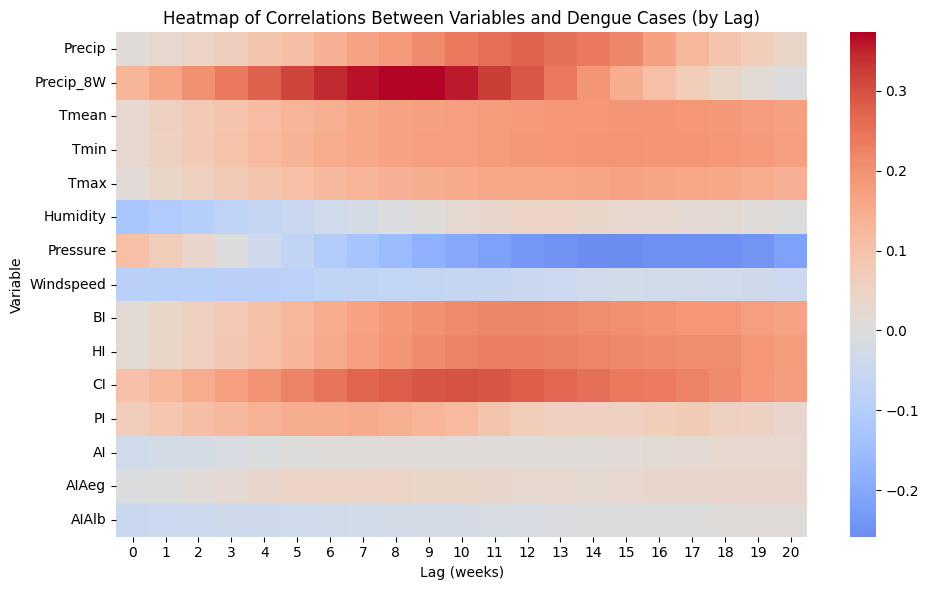

In [ ]:
import seaborn as sns

# Combine all r-values into one DataFrame for heatmap
corr_matrix = pd.DataFrame({
    var: results_dict[var]['r'].values for var in results_dict.keys()
}, index=results_dict[list(results_dict.keys())[0]]['Lag (weeks)'])

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix.T, cmap='coolwarm', center=0, annot=False)
plt.title('Heatmap of Correlations Between Variables and Dengue Cases (by Lag)')
plt.xlabel('Lag (weeks)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Example: if y is an array, convert to pandas Series
y = pd.Series(y)  # ensure it's a Series, not an ndarray

max_lag = 30
corrs = []

for lag in range(1, max_lag+1):
    valid = pd.concat([y, y.shift(lag)], axis=1).dropna()
    r, p = pearsonr(valid.iloc[:, 0], valid.iloc[:, 1])
    corrs.append((lag, r, p))

corr_df = pd.DataFrame(corrs, columns=['Lag (days)', 'r', 'p-value'])
print(corr_df)


    Lag (days)         r        p-value
0            1  0.969543   0.000000e+00
1            2  0.906618  1.198735e-304
2            3  0.821041  2.007279e-198
3            4  0.720927  2.434941e-130
4            5  0.619462   1.390630e-86
5            6  0.518984   1.031847e-56
6            7  0.424523   1.629738e-36
7            8  0.341457   2.238946e-23
8            9  0.269734   7.766615e-15
9           10  0.205554   4.324245e-09
10          11  0.151700   1.640186e-05
11          12  0.105493   2.830331e-03
12          13  0.068674   5.247648e-02
13          14  0.038955   2.720153e-01
14          15  0.015620   6.599241e-01
15          16 -0.002143   9.518862e-01
16          17 -0.015478   6.632137e-01
17          18 -0.024926   4.833434e-01
18          19 -0.032024   3.681037e-01
19          20 -0.037094   2.974234e-01
20          21 -0.040446   2.561764e-01
21          22 -0.042800   2.298076e-01
22          23 -0.044462   2.124939e-01
23          24 -0.045763   1.996897e-01


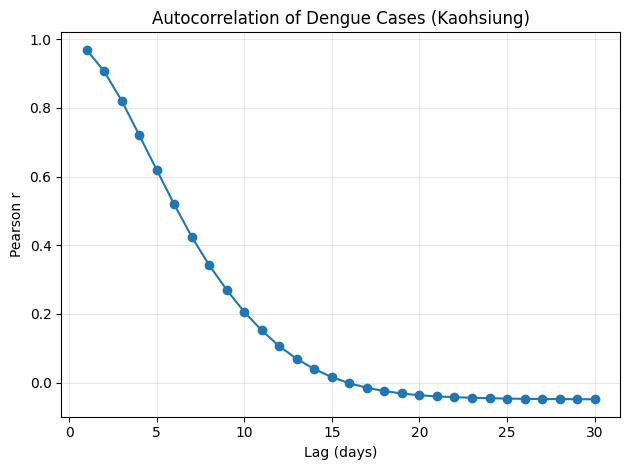

In [ ]:
import matplotlib.pyplot as plt

plt.plot(corr_df['Lag (days)'], corr_df['r'], marker='o')
plt.title('Autocorrelation of Dengue Cases (Kaohsiung)')
plt.xlabel('Lag (days)')
plt.ylabel('Pearson r')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

def best_lag_by_city(df, max_lag=30):
    result = []
    
    # Make sure Date is datetime once globally
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    for city, group in df.groupby('City'):
        # Drop rows without valid dates
        group = group.dropna(subset=['Date'])
        
        # Sort and ensure daily frequency
        y = (group.set_index('Date')
                  .sort_index()['Cases']
                  .asfreq('D', fill_value=0))
        
        best_r, best_lag = -1, None
        
        # Loop through daily lags
        for lag in range(1, max_lag+1):
            valid = pd.concat([y, y.shift(lag)], axis=1).dropna()
            if len(valid) < 10:
                continue
            r, _ = pearsonr(valid.iloc[:, 0], valid.iloc[:, 1])
            if r > best_r:
                best_r, best_lag = r, lag
        
        result.append((city, best_lag, best_r))
    
    return pd.DataFrame(result, columns=['City', 'Best Lag (days)', 'Max r'])

# Run the function
summary = best_lag_by_city(df)
print(summary.sort_values('Max r', ascending=False))



                                 City  Best Lag (days)     Max r
16                        Tainan City                1  0.993658
6                      Kaohsiung City                1  0.988977
21                      Yunlin County                2  0.814651
14                    Pingtung County                1  0.712188
2                       Chiayi County                1  0.612986
13                      Penghu County                1  0.565196
12                    New Taipei City                1  0.349253
15                      Taichung City                4  0.310937
1                         Chiayi City                1  0.212842
17                        Taipei City                2  0.197281
19                       Taoyuan City                1  0.166996
0                     Changhua County                2  0.165989
5                      Hualien County               22  0.133061
3                        Hsinchu City               14  0.132743
18                     Ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ------------ 1) Build city × lag correlation matrix (daily) ------------
def city_lag_corr_matrix(df, max_lag=30, min_points=30):
    """
    Returns:
      corr_mat: DataFrame [cities x lags] with Pearson r (Cases_t vs Cases_{t-lag})
      best_tbl: DataFrame with best lag and r per city
    """
    # Ensure datetime
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df = df.sort_values(['City', 'Date'])

    cities = df['City'].dropna().unique()
    lags = list(range(1, max_lag + 1))
    corr_rows = []

    best_rows = []
    for city in sorted(cities):
        g = df[df['City'].eq(city)]
        # One value per day per city; fill missing days with 0
        y = (g.set_index('Date')['Cases']
               .groupby(level=0).sum()
               .asfreq('D', fill_value=0))

        r_per_lag = []
        best_r, best_lag = -np.inf, None

        for L in lags:
            pair = pd.concat([y, y.shift(L)], axis=1)
            pair.columns = ['y', 'y_lag']
            pair = pair.dropna()
            if len(pair) < min_points:
                r = np.nan
            else:
                r, _ = pearsonr(pair['y'], pair['y_lag'])
            r_per_lag.append(r)

            if np.isfinite(r) and r > best_r:
                best_r, best_lag = r, L

        corr_rows.append(pd.Series(r_per_lag, index=lags, name=city))
        best_rows.append({'City': city, 'Best Lag (days)': best_lag, 'Max r': best_r})

    corr_mat = pd.DataFrame(corr_rows)        # rows=cities, cols=lags
    best_tbl = pd.DataFrame(best_rows).sort_values(['Max r'], ascending=False, key=lambda s: s.fillna(-np.inf))

    return corr_mat, best_tbl

corr_mat, best_tbl = city_lag_corr_matrix(df, max_lag=30, min_points=30)

# Optional: save results
corr_mat.to_csv("city_lag_correlation_matrix_cases_daily.csv")
best_tbl.to_csv("city_best_lag_cases_daily.csv", index=False)

print(best_tbl.head(10))
corr_mat.head()



               City  Best Lag (days)     Max r
16      Tainan City                1  0.993658
6    Kaohsiung City                1  0.988977
21    Yunlin County                2  0.814651
14  Pingtung County                1  0.712188
2     Chiayi County                1  0.612986
13    Penghu County                1  0.565196
12  New Taipei City                1  0.349253
15    Taichung City                4  0.310937
1       Chiayi City                1  0.212842
17      Taipei City                2  0.197281


,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Changhua County,0.128059,0.165989,0.104956,0.088676,0.092739,0.121214,0.080523,0.076449,0.076443,0.080506,...,0.109288,0.109283,0.109277,0.092965,0.060347,0.092955,0.068489,0.052176,0.035864,0.068472
Chiayi City,0.212842,0.127109,0.197250,0.127105,0.134897,0.072545,0.088130,0.103715,0.150476,0.173855,...,0.056923,0.049126,0.103683,0.095886,0.095884,0.103676,0.111468,0.142642,0.088081,0.095873
Chiayi County,0.612986,0.563083,0.551992,0.576387,0.546444,0.556423,0.534242,0.585252,0.540893,0.490988,...,0.563393,0.546748,0.528994,0.435789,0.446883,0.506797,0.480166,0.450205,0.428012,0.393613
Hsinchu City,0.039609,0.111277,0.082605,0.046766,0.025261,0.068261,0.046756,0.068255,0.053917,0.053914,...,0.039544,-0.003465,0.053872,0.010863,0.068201,0.032360,0.075363,0.118366,0.061021,0.082521
Hsinchu County,0.078791,0.090411,0.079143,0.028450,0.073504,0.045339,0.034070,0.039699,0.039695,0.034059,...,0.034502,0.034498,0.034494,0.034490,0.062802,0.045809,0.074473,0.085826,0.034716,0.074462


## Feature Engineering

In [ ]:
import pandas as pd

# =============================
# Config
# =============================
LAGS = {
    'Cases':    [1, 7, 14],
    'Precip_8W':[56],
    'Precip':   [84],
    'CI':       [70],
    'HI':       [77],
    'BI':       [77],
    'PI':       [49],
    'Tmean':    [105],
    'Tmin':     [105],
    'Tmax':     [105],
    'Pressure': [0, 7],
}
# rolling window requirement for base features (0 if none)
WINDOW_REQ = {
    'Precip_8W': 56
}

WEATHER_COLS = ['Pressure','Tmean','Tmin','Tmax','Humidity','Windspeed','Precip']
VECTOR_COLS  = ['BI','HI','CI','PI','AI','AIAeg','AIAlb']

# =============================
# 1) Parse Date + sort
# =============================
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['City', 'Date'])

# =============================
# 2) Continuous daily index per City (Date stays as index)
# =============================
blocks = []
for city, g in df.groupby('City', sort=False):
    g = g.set_index('Date').asfreq('D')   # introduces NaNs for missing days
    g['City'] = city
    blocks.append(g)

df = pd.concat(blocks)
df.index.name = 'Date'


# =============================
# 3) Fill Cases NaN with 0
# =============================
df['Cases'] = df['Cases'].fillna(0)

# =============================
# 4) Impute other features before rolling/lagging
#    - weather: interpolate smoothly (per city)
#    - vector indices: forward/backward fill (per city)
# =============================
existing_weather = [c for c in WEATHER_COLS if c in df.columns]
if existing_weather:
    df[existing_weather] = df.groupby('City')[existing_weather].transform(
        lambda x: x.interpolate(limit_direction='both')
        # Optionally add: , limit=7  to avoid bridging long gaps
    )

existing_vector = [c for c in VECTOR_COLS if c in df.columns]
df[existing_vector] = (
    df.groupby('City')[existing_vector]
      .transform(lambda x: x.ffill(limit=14).bfill(limit=14))
)


# =============================
# 5) Build 8-week accumulated precipitation (56 days) per City
# =============================
if 'Precip' in df.columns:
    df['Precip_8W'] = (
        df.groupby('City')['Precip']
          .transform(lambda s: s.rolling(window=56, min_periods=56).sum())
    )

# =============================
# 6) Create lag features per City
# =============================
for col, lag_list in LAGS.items():
    if col not in df.columns:
        continue  # skip if source column doesn't exist
    for lag in lag_list:
        out_col = f'{col}_lag{lag}'
        if lag == 0:
            df[out_col] = df[col]
        else:
            df[out_col] = df.groupby('City')[col].shift(lag)

# =============================
# 7) Trim early rows per city that lack full history
#    Compute required history as max(window + lag) across all lags
# =============================
required_history_days = 0
for col, lag_list in LAGS.items():
    base = WINDOW_REQ.get(col, 0)
    for n in lag_list:
        required_history_days = max(required_history_days, base + n)

# Mark day index per city and keep rows with enough history
df['__day_idx'] = df.groupby('City').cumcount()
df = df[df['__day_idx'] >= required_history_days].drop(columns='__day_idx')

# =============================
# 8) Save to CSV with Date as column (not index)
# =============================
out = df.reset_index().sort_values(['City','Date'])
out.to_csv("../data/5_df_with_lags.csv", index=False)

print(f"Required history (days): {required_history_days}")
print(out.info())
print(out.head())


Required history (days): 112
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114395 entries, 0 to 114394
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             114395 non-null  datetime64[ns]
 1   City             114395 non-null  object        
 2   Cases            114395 non-null  float64       
 3   Pressure         108939 non-null  float64       
 4   Tmean            114395 non-null  float64       
 5   Tmin             114395 non-null  float64       
 6   Tmax             114395 non-null  float64       
 7   Humidity         114395 non-null  float64       
 8   Windspeed        114395 non-null  float64       
 9   Precip           114395 non-null  float64       
 10  BI               38716 non-null   float64       
 11  HI               38716 non-null   float64       
 12  CI               38625 non-null   float64       
 13  PI               22189 non-null   float64    

In [ ]:
df['Pressure'].isna().groupby(df['City']).mean().sort_values(ascending=False)


City
Miaoli County                        1.0
Changhua County                      0.0
New Taipei City                      0.0
Yilan County                         0.0
Taoyuan City                         0.0
Taitung County                       0.0
Taipei City                          0.0
Tainan City                          0.0
Taichung City                        0.0
Pingtung County                      0.0
Penghu County                        0.0
Nantou County                        0.0
Chiayi City                          0.0
Lienchiang County (Matsu Islands)    0.0
Kinmen County                        0.0
Keelung City                         0.0
Kaohsiung City                       0.0
Hualien County                       0.0
Hsinchu County                       0.0
Hsinchu City                         0.0
Chiayi County                        0.0
Yunlin County                        0.0
Name: Pressure, dtype: float64

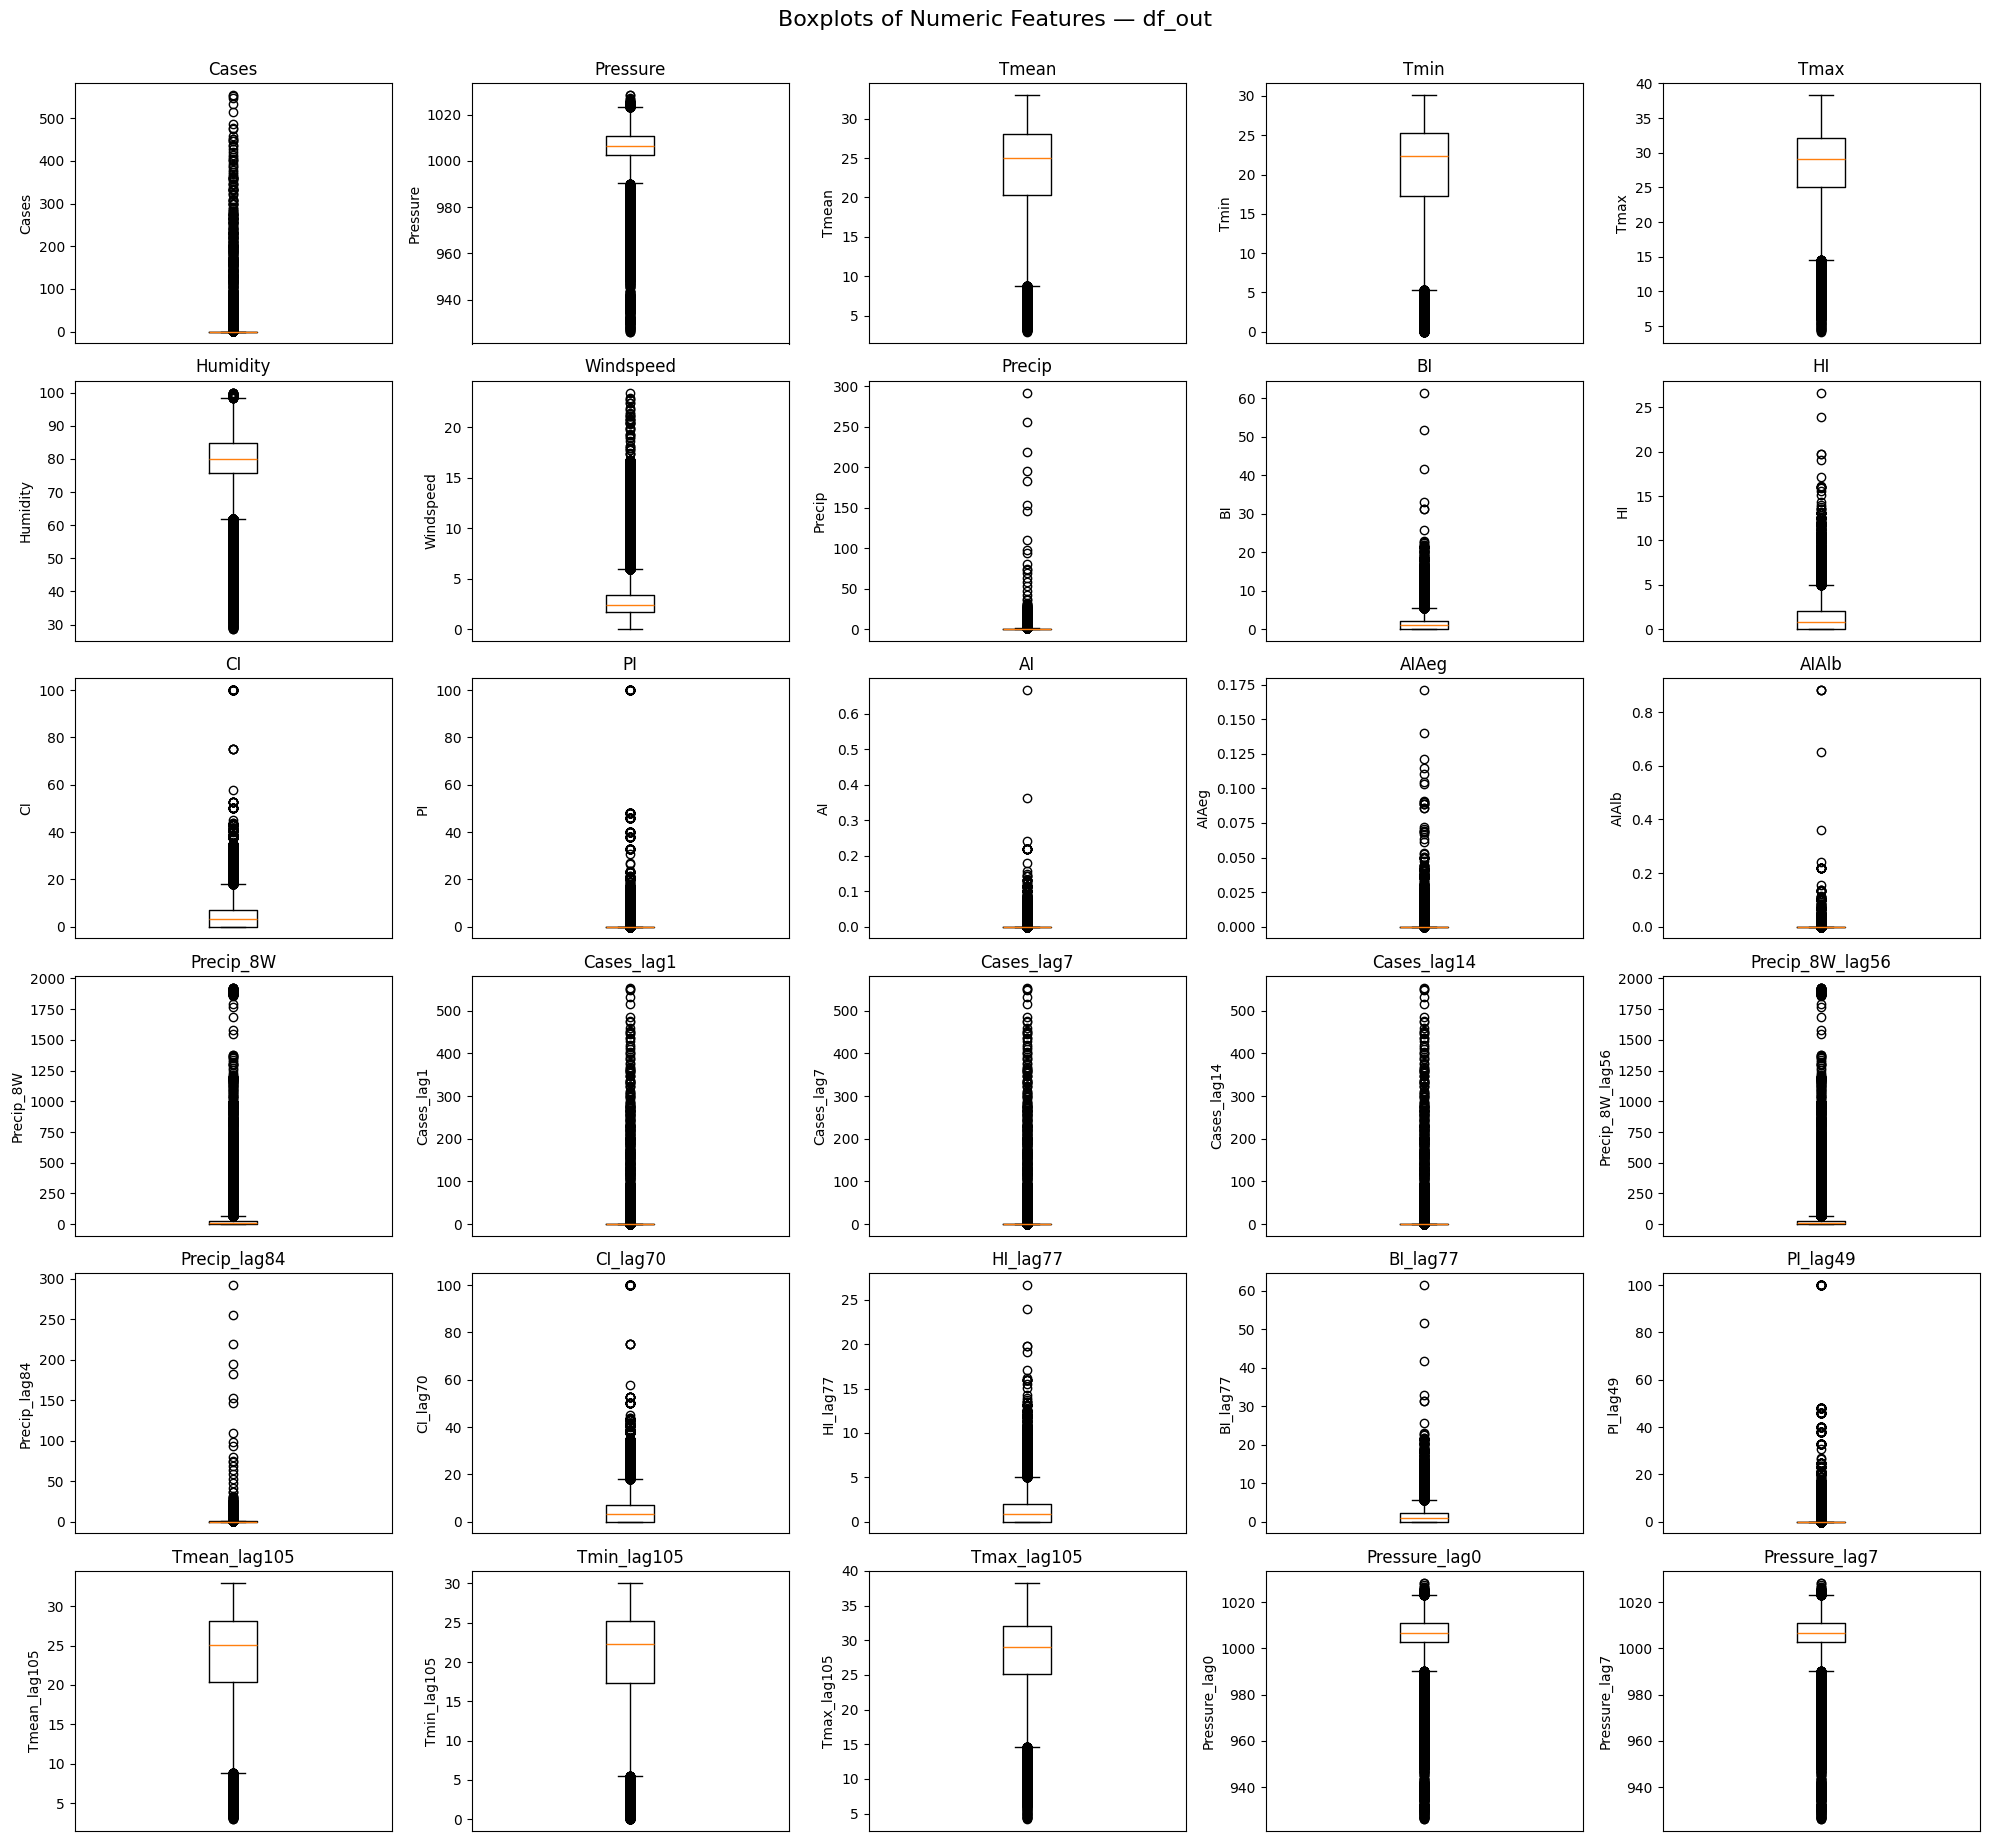

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplot_grid(
    df,
    numeric_cols=None,
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title='Boxplots of Numeric Features',
    sample_n=None,         # e.g., 200_000 to speed up on very large data
    showfliers=True,       # show outliers
    vert=True              # vertical boxplots
):
    """
    Plot a grid of boxplots for numeric columns in a DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    numeric_cols : list[str] | None
        Columns to plot. If None, all numeric columns are used.
    cols_per_row : int
        Number of plots per row.
    figsize_per_plot : tuple
        Size per subplot (width, height).
    title : str
        Suptitle for the figure.
    sample_n : int | None
        If set, randomly sample this many rows to speed up plotting.
    showfliers : bool
        Whether to display outliers.
    vert : bool
        Vertical (True) or horizontal (False) boxplots.
    """

    # Optional sampling to speed up plotting on huge dataframes
    data = df if sample_n is None or len(df) <= (sample_n or 0) else df.sample(sample_n, random_state=42)

    # Determine numeric columns if not provided
    if numeric_cols is None:
        numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

    if len(numeric_cols) == 0:
        raise ValueError("No numeric columns found to plot.")

    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / cols_per_row)

    # Create subplots
    fig, axes = plt.subplots(
        n_rows, cols_per_row,
        figsize=(cols_per_row * figsize_per_plot[0], n_rows * figsize_per_plot[1])
    )

    # Ensure axes is a 1-D array
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = np.array([axes])

    # Plot each numeric column
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        series = data[col].dropna().values
        if series.size == 0:
            ax.set_title(f"{col} (no data)")
            ax.axis('off')
            continue

        ax.boxplot(series, vert=vert, showfliers=showfliers)
        ax.set_title(col)
        if vert:
            ax.set_xticks([])
            ax.set_xlabel("")
            ax.set_ylabel(col)
        else:
            ax.set_yticks([])
            ax.set_ylabel("")
            ax.set_xlabel(col)

    # Hide any leftover axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Layout & title
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()
    return fig, axes

# ---- Run it on your dataset ----
# If your cleaned dataframe is named `out`, alias it:
df_out = out.copy()

# OPTIONAL: choose a subset to avoid an overly crowded grid, e.g.:
# numeric_cols = ['Cases','Precip','Tmean','Tmin','Tmax','Humidity','Windspeed',
#                 'Precip_8W','Cases_lag7','Precip_lag84','Tmean_lag105']

_ = plot_boxplot_grid(
    df_out,
    # numeric_cols=numeric_cols,   # uncomment to use a custom subset
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title="Boxplots of Numeric Features — df_out",
    sample_n=200_000,      # optional
    showfliers=True,
    vert=True
)
